# 0. Загрузка данных

Нумерация ячеек с кодом начинается с 1, потому что я сделал [cell -> all output -> clear], т.к. файл со всеми попытками весил очень много и открывался медленно

In [1]:
# Импортируем базовые пакеты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузим датасет
df = pd.read_csv('HW1_var_12.csv', sep=';')

# Номер варианта - бесполезная информация для анализа
df.drop('Номер варианта', axis=1, inplace=True)
df.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000012,Форма банка (без печати работодателя),Ремонт,1.0,0.59,мужской,0,0,среднее-специальное,менеджер высшего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000032,2НДФЛ,Ремонт,1.0,0.55,мужской,0,0,высшее,специалист,...,0.0,7.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000052,2НДФЛ,Ремонт,1.0,0.23,женский,1,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000072,Свободная форма с печатью работодателя,Покупка земли,0.0,0.32,мужской,0,0,второе высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000092,Поступление зарплаты на счет,Ремонт,0.0,0.31,мужской,2,0,высшее,специалист,...,1.0,13.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(10242, 43)

# 1. Исследование и предобработка данных

#### 1.0. Разделим переменные по типам данных

In [20]:
# Вытащим ID переменных по группам - числовые, категориальные, все кроме ID
# Может пригодиться в дальнейших исследованиях
cat_var = []
num_var = []

for i in range(len(df.dtypes)):
    if df.dtypes[i] == object:
        cat_var.append(df.columns.values[i])
    else:
        if df.columns.values[i] != 'ID':
            num_var.append(df.columns.values[i])

all_var = cat_var + num_var

print('num_cols: ', num_var)
print('')
print('cat_cols: ', cat_var)
print('')
print('all_cols: ', all_var)


num_cols:  ['INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

cat_cols:  ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']

all_cols:  ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'max90d

**1.1.1. Количество уникальных значений, нулевых и пустых значений доля в % от общего количества**

**Вывод:** примерно по половине переменных доля пропущенных значений составляет около 63.96%. Это говорит нам о том, что выкидывать строки с пропущенными значениями из датасета не стоит, иначе мы потеряем большую часть всей выборки!

**Анализ пропущенных значений** показал, что общие данные доступны практически по всем потенциальным заемщикам, при этом более специфические банковские данные отсуствуют более, чем у половины потенциальных заемщиков. <br>
Нам доступны некоторые общие данные о заемщиках (судя по переменным, это данные о заемщиках), например, по возрасту, полу, образованию, цели кредитования. В этих данных пропуски практически отсутствуют, при этом значительная доля пропусков есть в таких переменных, как, например, данные о кредитах, счетах, просрочках, платежах за определенный период. Данная ситуация реалистична, ведь банку впонле могут быть недоступны данные о счетах и кредитах, если человек не брал кредиты/не открывал счета или обслуживался в другом банке, или вообще не пользовался банковскими услугами до этого.

**Анализ нулевых значений** продемонстрировал, что у приблизительно 60% заемщиков нет совершеннолетних детей, вероятно, эти данные могут вносить некоторые проблемы при построении линейных моделей, так как, по моей гипотезе, будут сильно коррелировать с возрастом. Это не причина удалять эту перменную, но неплохо было бы держать этот факт в голове при построении моделей. <br> 
Другой интересный вывод из анализа нулевых значений можно сделать по переменным, которые начинаются на "max" и несут в себе информацию о том, делали ли запросы в бюро кредитных историй по ним или нет. Нулевых значений за последние 90 дней всего 1000, а это значит, что заемщики обращаются сразу в несколько банков в поисках лучших условий. <br> 
Третий вывод заключается в том, что все заемщики, по которым есть такие данные, ранее брали кредиты - 0 нулевых значений в переменной all_credits. Это частично соотносится с моей гипотезой в пункте про пропущенные значения о том, что много пропусков, так как не использовал кредиты. Интересная идея бы была ввести еще одну переменную "есть ли данные о кредитах по заемщику или нет"

**Анализ уникальных значений**
Один заемщик встречается в датасете только один раз <br>
Есть некоторые переменные, которые принимают очень небольшое количество значений (до 10), большинство из них - категориальные

In [5]:
# Посчитаем уникальные значения по каждому столбцу
# Количество уникальных значений как доля от общего числа значений !не учитывая пустые!
uniques_share = []
uniques = []

for col in df:
        uniques.append(len(df[col].unique()))
        uniques_share.append(len(df[col].unique()) / (df[col]).count())
        
# Количество пустных(nan) и нулевых (zero) значений по столбцам как доля от общего числа
# Также добавил абсолютные количества уникальных, нулевых и пустых значений
null_nan_df = pd.DataFrame()
null_nan_df['nan'] = (max(df.isnull().count()) - df.count()) 
null_nan_df['zero'] = (df == 0).sum() 
null_nan_df['unique'] = uniques
null_nan_df['nan_share'] = (max(df.isnull().count()) - df.count()) / max(df.isnull().count())
null_nan_df['zero_share'] = (df == 0).sum() / max(df.count())
null_nan_df['unique_share'] = uniques_share
null_nan_df

,nan,zero,unique,nan_share,zero_share,unique_share
ID,0,0,10242,0.000000,0.000000,1.000000
INCOME_BASE_TYPE,81,0,6,0.007909,0.000000,0.000590
CREDIT_PURPOSE,0,0,10,0.000000,0.000000,0.000976
INSURANCE_FLAG,1,4082,3,0.000098,0.398555,0.000293
DTI,140,0,59,0.013669,0.000000,0.005840
SEX,0,0,2,0.000000,0.000000,0.000195
FULL_AGE_CHILD_NUMBER,0,6111,6,0.000000,0.596661,0.000586
DEPENDANT_NUMBER,0,10208,3,0.000000,0.996680,0.000293
EDUCATION,0,0,9,0.000000,0.000000,0.000879
EMPL_TYPE,12,0,10,0.001172,0.000000,0.000978


**1.1.2. Среднее значение, медиана, стандартное отклонение, минимум, максимум**

In [6]:
# Посмотрим основные статистики по переменным
# Код для медианы: https://stackoverflow.com/questions/38545828/pandas-describe-by-additional-parameters
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis=1).agg(stats))

describe(df,['median']).T

,count,mean,std,min,25%,50%,75%,max,median
ID,10242.0,1.102422e+06,59135.101251,1000012.00,1.051217e+06,1.102422e+06,1.153627e+06,1.204832e+06,1.102422e+06
INSURANCE_FLAG,10241.0,6.014061e-01,0.489633,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
DTI,10102.0,3.843239e-01,0.137268,0.02,2.800000e-01,4.000000e-01,4.900000e-01,5.900000e-01,4.000000e-01
FULL_AGE_CHILD_NUMBER,10242.0,5.508690e-01,0.765683,0.00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
DEPENDANT_NUMBER,10242.0,4.393673e-03,0.080765,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
BANKACCOUNT_FLAG,8008.0,3.882368e-01,0.878960,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
Period_at_work,8008.0,6.549476e+01,66.605621,6.00,2.000000e+01,4.400000e+01,8.700000e+01,1.202000e+03,4.400000e+01
age,8008.0,3.624525e+01,8.557874,23.00,2.900000e+01,3.500000e+01,4.200000e+01,6.300000e+01,3.500000e+01
max90days,3955.0,1.588875e+00,1.872620,0.00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+01,1.000000e+00
max60days,3955.0,1.149937e+00,1.533976,0.00,0.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01,1.000000e+00


**Выводы:** можно заметить, что размерности у величин разные, например, возраст в годах, а период на работе скорее всего в месяцах, какие-то переменные вообще в днях, это может оказаться важным, если бы мы создавали какие-то дополнительные фичи для модели, но я не планирую такого делать, поэтому в целом можно сказать, что данный анализ не выявил никаких существенных выводов

**1.1.2. Тип данных по каждому показателю**

In [7]:
# Посмотрим основные данные о датасете и переменных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10242 non-null  int64  
 1   INCOME_BASE_TYPE       10161 non-null  object 
 2   CREDIT_PURPOSE         10242 non-null  object 
 3   INSURANCE_FLAG         10241 non-null  float64
 4   DTI                    10102 non-null  float64
 5   SEX                    10242 non-null  object 
 6   FULL_AGE_CHILD_NUMBER  10242 non-null  int64  
 7   DEPENDANT_NUMBER       10242 non-null  int64  
 8   EDUCATION              10242 non-null  object 
 9   EMPL_TYPE              10230 non-null  object 
 10  EMPL_SIZE              10104 non-null  object 
 11  BANKACCOUNT_FLAG       8008 non-null   float64
 12  Period_at_work         8008 non-null   float64
 13  age                    8008 non-null   float64
 14  EMPL_PROPERTY          8007 non-null   object 
 15  EM

**Выводы:** все переменные делятся на два типа: текстовые и числовые (нецелые), при этом целочисленными являются только ID и номер варианта

**1.1.3. Распределение данных по полу, возрасту и другим категориальным показателям**

**Выводы:**

В датасете 9 категориальных признаков
- INCOME_BASE_TYPE
- CREDIT_PURPOSE
- SEX
- EDUCATION
- EMPL_TYPE
- EMPL_SIZE
- EMPL_PROPERTY
- EMPL_FORM
- FAMILY_STATUS

In [9]:
# Выше вытаскивали категориальные и целочисленные признаки

print(cat_var)
print('Количество категориальных признаков:',len(cat_var))

['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']
Количество категориальных признаков: 9


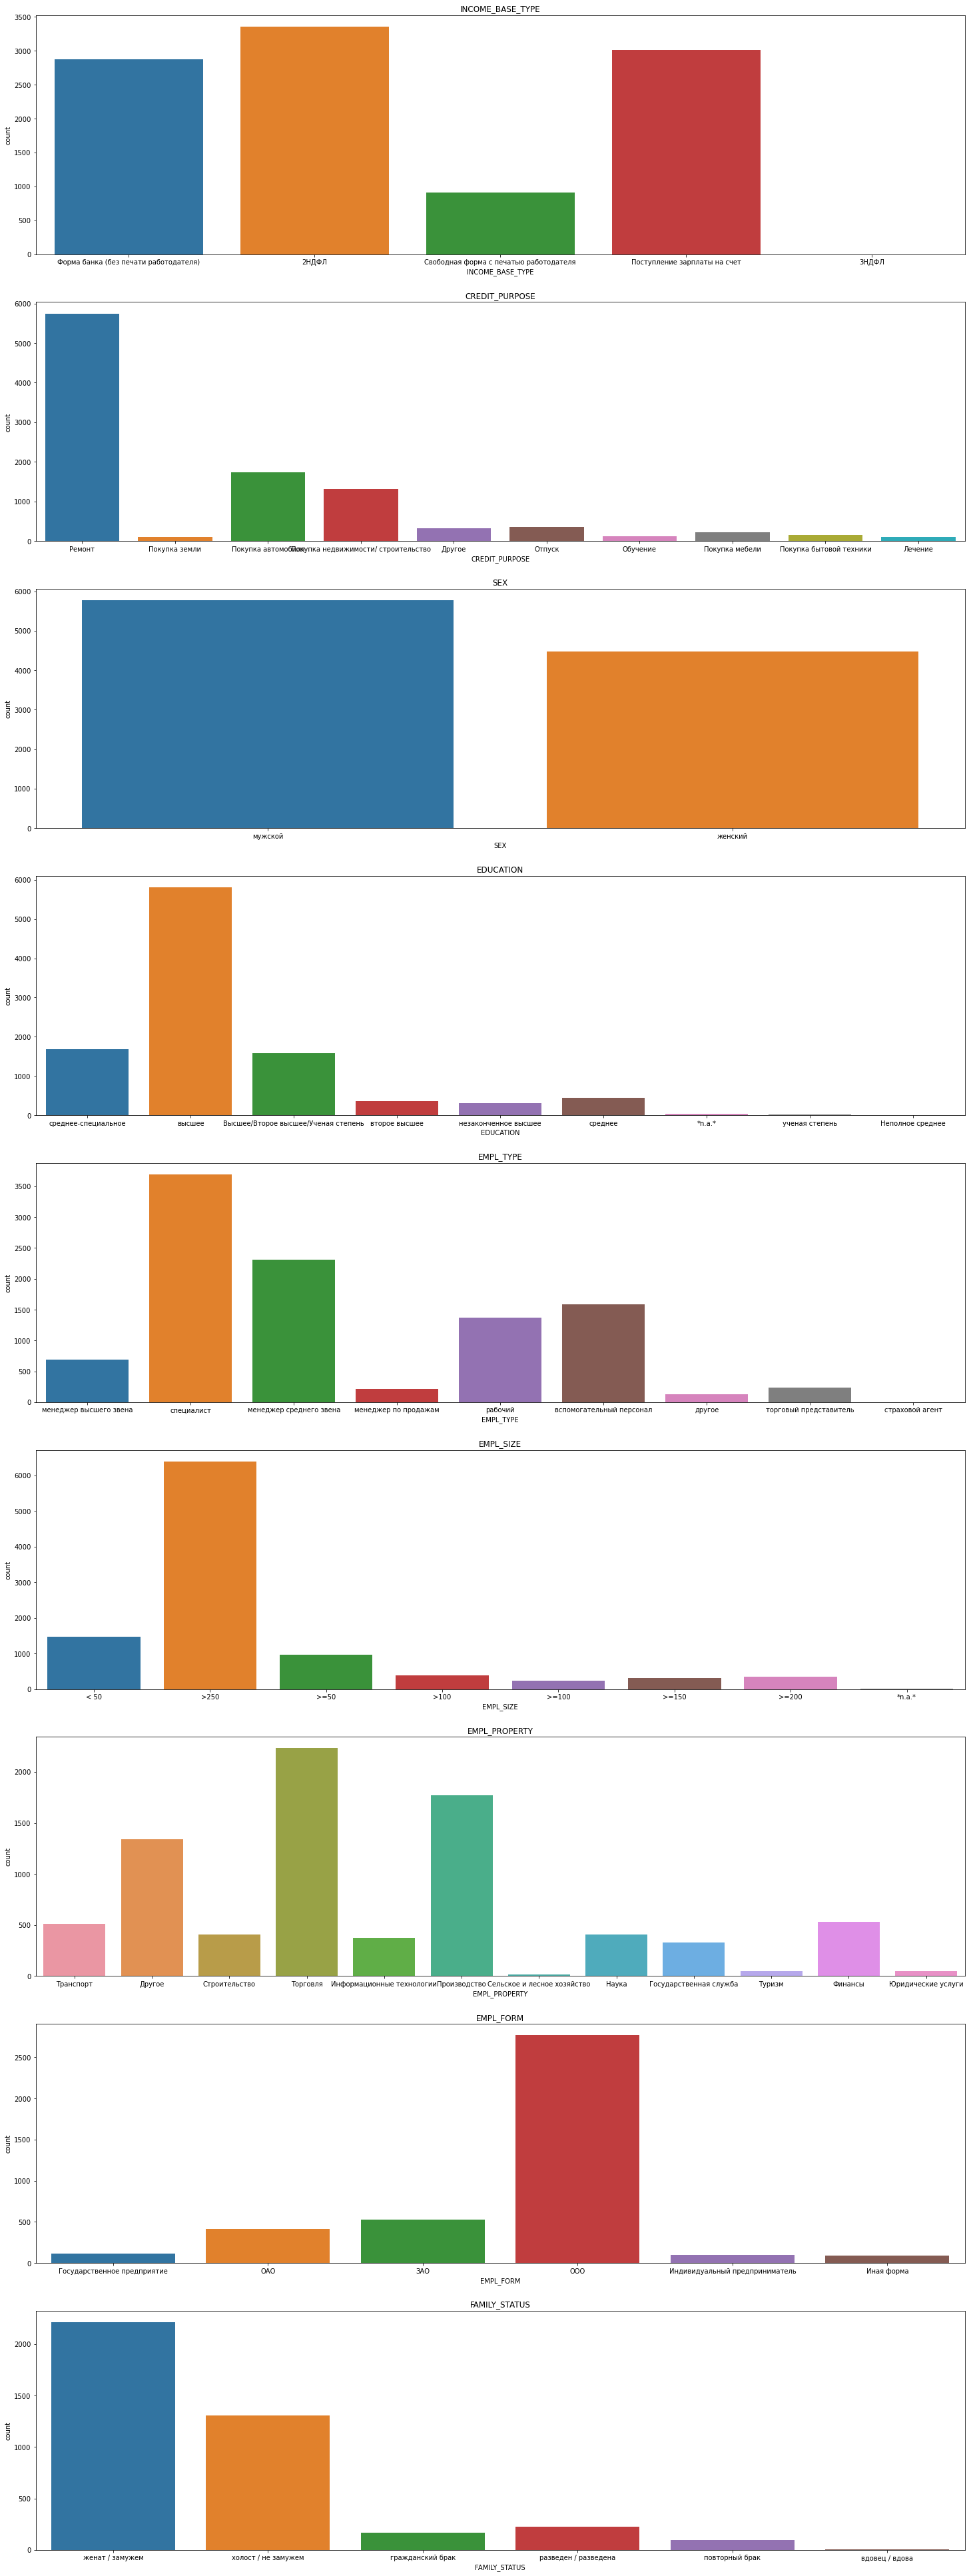

In [10]:
# Построим графики
fig, ax = plt.subplots(len(cat_var), figsize=(25, 70))

sns.set_style()

for i in range(len(cat_var)):
    sns.countplot(x=str(cat_var[i]), data=df, ax = ax[i])
    ax[i].title.set_text(str(cat_var[i]))

**Выводы:**  
- Большинство людей подтверждают доходы через 2НДФЛ, второй по попоулярности вариант - поступлениие зарплаты на счет (думаю, этот вариант доступен только для клиентов банка, в котором хотят взять кредит), далее идут бланк без печати работодателя (не знаком с такой формой, но, возможно, такие заявки стоило бы проверять тщательнее), меньше всего - в свободной форме с печатью работодателя (также стоит обратить внимание).
- Основная цель кредита - это ремонт, покупка авто и недвижимости, остальные категории имеют очень низкие доли
- Большая часть потенциальных заемщиков - мужчины
- У большинства потенциальных заемщиков есть как минимум среднее специальное образование. Второе высшее дублируется в двух вариантах ответа, что кажется мне странным
- Большая доля потенциальных заемщиков - это специалисты, менеджеры среднего звена, вспомогательный персонал и рабочие. Есть две категории (торговый представитель и страховой агент, которые на самом деле стоило бы отнести к какому-то из других типов (например, страховой агент - скорее всего является специалистом, как и торговый представитель)
- Большая доля потенциальных заемщиков работает в крупных компаниях (более 250 сотрудников)
- Большая доля потенциальных заемщиков работает в торговле и производстве, велика доля категории "Другое"
- Большая доля потенциальных заемщиков работает в компаниях организационно-правовой формы ООО
- Большая доля потенциальных заемщиков женаты, при этом, как мне кажется, многие предпочитают выбирать категорию "не замужем" вместо "гражданский брак" - не думаю, что все готовы раскрывать свой семейный статус. "Повторный брак" является подкатегорией "женат/замужем" - классификация, как бы сказали консультанты - не MECE)

**1.2.1. Проверка на полноту данных по клиентам**

43

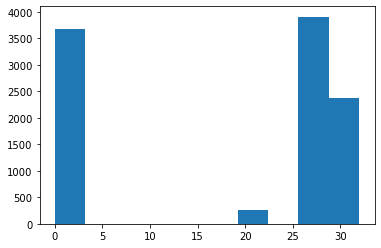

In [11]:
# Количество пропущенных полей по клиентам, включая ID
plt.hist(df.isnull().sum(axis=1))

# Количество полей всего, включая ID
len(df.columns.values)

**Выводы:** у большой доли клиентов более 25 пропущенных полей, поэтому, как упомяналось ранее - нет целесообразности в том, чтобы удалять наблюдения (клиентов), чтобы не потерять большую долю всех данных

**1.2.2. Проверка на наличие некорректных знаков**

In [21]:
# Некоторые переменные имеют слишком большие значения и из-за них масштаб графика не дает проанализировать остальные
num_var_list = num_var

num_var_list.remove('Period_at_work')
num_var_list.remove('sum_of_paym_months')
num_var_list.remove('min_MnthAfterLoan')
num_var_list.remove('max_MnthAfterLoan')
num_var_list.remove('age')

additional_num_var_list = ['Period_at_work', 'sum_of_paym_months', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'age']

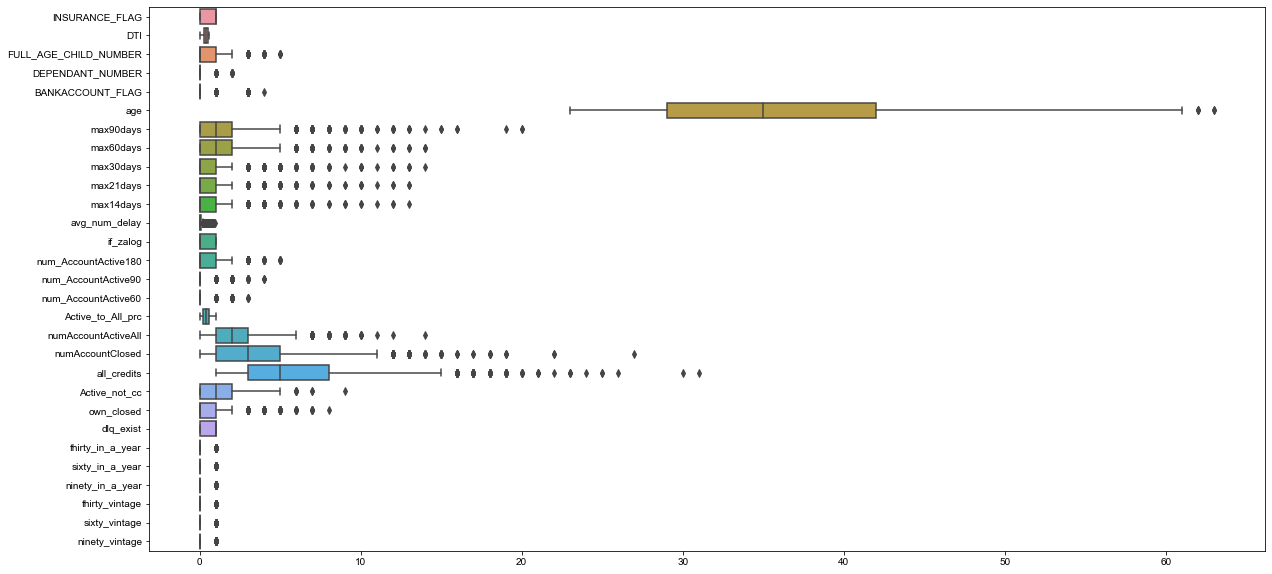

In [16]:
# Построем boxplot для числовых признаков
fig, axes = plt.subplots(figsize=(20,10))

sns.set(style="whitegrid")
sns.boxplot(data=df.loc[:,num_var_list], ax = axes, orient ='h')

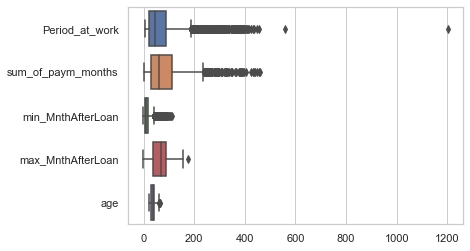

In [22]:
# Возраст и 4 других показателя несколько выбивались по размерности от других показателей, искажая график выше, поэтому сделал их отдельно
fig, axes = plt.subplots()

sns.set(style="whitegrid")
sns.boxplot(data=df[additional_num_var_list], ax = axes, orient ='h')

**Выводы:** отклонений в знаках не обнаружено

**1.2.3. Проверка на пропущенные значения в полях**

In [23]:
# Этот код уже использовался выше, так как я смотрел количство пропущенных значений по столбцам
null_nan_df = pd.DataFrame()
null_nan_df['nan'] = (max(df.isnull().count()) - df.count()) 
null_nan_df['nan_share'] = (max(df.isnull().count()) - df.count()) / max(df.isnull().count())
null_nan_df

,nan,nan_share
ID,0,0.000000
INCOME_BASE_TYPE,81,0.007909
CREDIT_PURPOSE,0,0.000000
INSURANCE_FLAG,1,0.000098
DTI,140,0.013669
SEX,0,0.000000
FULL_AGE_CHILD_NUMBER,0,0.000000
DEPENDANT_NUMBER,0,0.000000
EDUCATION,0,0.000000
EMPL_TYPE,12,0.001172


**Выводы:** уже упоминались подробно в предыдущих частях анализа

**1.3.1.Корректировка данных – исправление ошибок**

In [25]:
df[num_var] = df[num_var].fillna(-10000)

In [26]:
df.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000012,Форма банка (без печати работодателя),Ремонт,1.0,0.59,мужской,0,0,среднее-специальное,менеджер высшего звена,...,-10000.0,NaN,NaN,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
1,1000032,2НДФЛ,Ремонт,1.0,0.55,мужской,0,0,высшее,специалист,...,0.0,7.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000052,2НДФЛ,Ремонт,1.0,0.23,женский,1,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,...,-10000.0,NaN,NaN,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
3,1000072,Свободная форма с печатью работодателя,Покупка земли,0.0,0.32,мужской,0,0,второе высшее,менеджер среднего звена,...,-10000.0,NaN,NaN,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
4,1000092,Поступление зарплаты на счет,Ремонт,0.0,0.31,мужской,2,0,высшее,специалист,...,1.0,13.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Выводы:** существенных ошибок нет, кроме пропусков, я предлагаю заменить их каким-то отрицальным числом (-10000), большим по модулю, чтобы модели легко различали такие наблюдения, но при этом не пропускали бы такие наблюдения, также это удобно для графиков <br>
Стоит отметить, что мы заполняли пропуски здесь только для числовых переменных

**1.3.2.Исключение клиентов с большим числом пропусков или восстанавление пропущенных значений**

**Выводы:** не будем исключать клиентов с большим числом пропусков, так как они составляют около 60% выборки, пропущенные значения заполнили методом, описанным в предыдущем пункте

**1.3.3.Перевод категориальных признаков в целочисленные**

In [27]:
# Закодируем категориальные переменные с помощью onehot-encoding
df = pd.get_dummies(df, columns=cat_var)
df = df.fillna(-10000)
df.head(10)

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
0,1000012,1.0,0.59,0,0,0.0,100.0,51.0,-10000.0,-10000.0,...,0,0,0,0,0,0,0,0,0,0
1,1000032,1.0,0.55,0,0,3.0,29.0,52.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1000052,1.0,0.23,1,0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,0,0,0,0,0,0,0,0,0,0
3,1000072,0.0,0.32,0,0,0.0,63.0,57.0,-10000.0,-10000.0,...,0,0,0,0,0,0,0,0,0,0
4,1000092,0.0,0.31,2,0,1.0,106.0,34.0,3.0,3.0,...,0,0,1,0,0,0,1,0,0,0
5,1000112,0.0,0.22,1,0,0.0,69.0,30.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
6,1000132,1.0,0.12,0,0,0.0,28.0,53.0,-10000.0,-10000.0,...,0,0,0,0,0,0,0,0,0,0
7,1000152,0.0,0.44,0,0,0.0,65.0,32.0,-10000.0,-10000.0,...,0,0,0,0,0,0,0,0,0,0
8,1000172,0.0,0.42,0,0,0.0,11.0,47.0,3.0,2.0,...,0,0,0,1,0,0,1,0,0,0
9,1000192,0.0,0.58,0,0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,0,0,0,0,0,0,0,0,0,0


**Выводы:** используя one-hot-encoder, мы закодировали категориальные переменные для дальнейшего использования в построении моделей сегментации

#### * корреляционная матрица

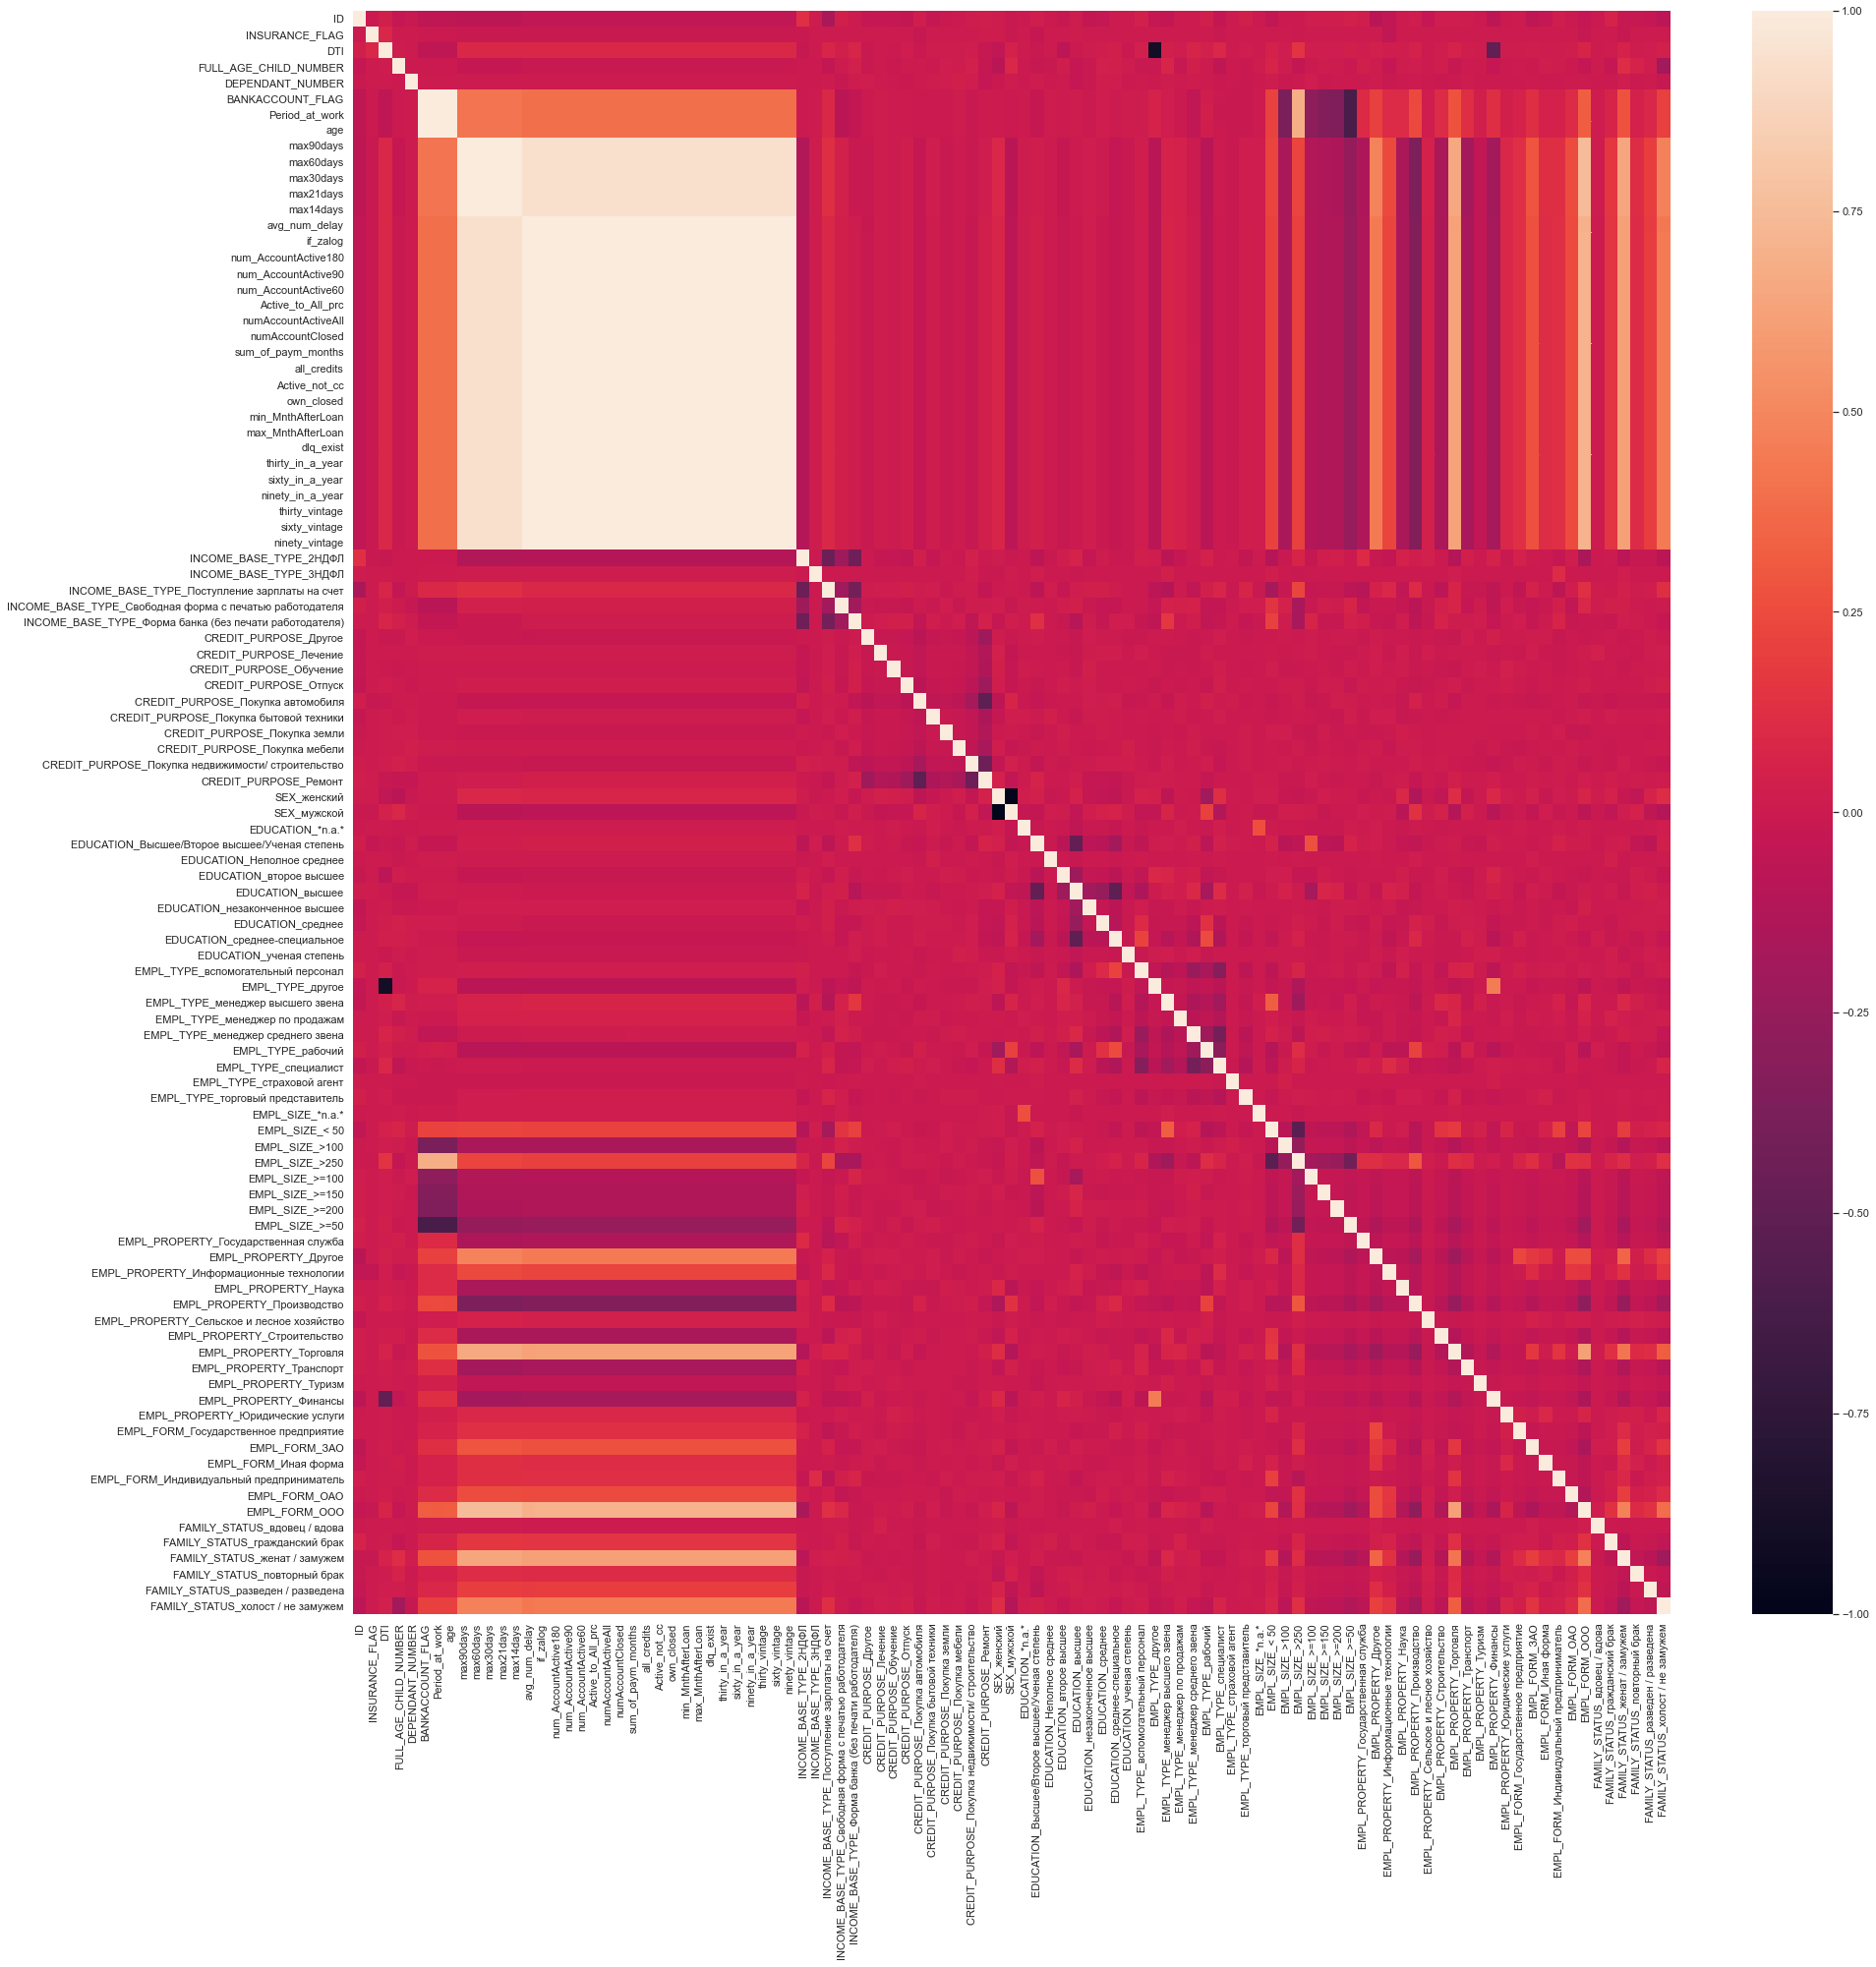

In [28]:
# Форма немного странная, потому что здесь также включены и категориальные переменные, которые я перевел в dummies
fig, axes = plt.subplots(figsize=(30,30))
sns.heatmap(df.corr())

**Выводы:**
- У большинства переменных корреляция с другими низкая по модулю (близка к 0)
- Переменные с приставкой max (количество запросов в кредитное бюро) очень сильно коррелируют друг с другом, что соотносится со здравым смыслом. Их стоит как-то сгруппировать или оставить лишь одну из этой группы
- Такой же вывод про переменные ninety_..., sixty_...,thirty_... Их стоит как-то сгруппировать или оставить лишь одну из этой группы
- Некоторые выводы, которые, как я предполагаю, не очень полезны, например: Чем ближе к текущему моменту дали последний кредит - тем больше открытых счетов

# 1.4.1. Выводы по исследованию данных
## Выводы ниже будут основаны на выводах, которые делались в каждой из подчастей выше

###### 1.1.1. Количество уникальных значений, нулевых и пустых значений доля в % от общего количества

Вывод: примерно по половине переменных доля пропущенных значений составляет около 63.96%. Это говорит нам о том, что выкидывать строки с пропущенными значениями из датасета не стоит, иначе мы потеряем большую часть всей выборки!
<br>
**Анализ пропущенных значений** показал, что общие данные доступны практически по всем потенциальным заемщикам, при этом более специфические банковские данные отсуствуют более, чем у половины потенциальных заемщиков.<br>
Нам доступны некоторые общие данные о заемщиках (судя по переменным, это данные о заемщиках), например, по возрасту, полу, образованию, цели кредитования. В этих данных пропуски практически отсутствуют, при этом значительная доля пропусков есть в таких переменных, как, например, данные о кредитах, счетах, просрочках, платежах за определенный период. Данная ситуация реалистична, ведь банку впонле могут быть недоступны данные о счетах и кредитах, если человек не брал кредиты/не открывал счета или обслуживался в другом банке, или вообще не пользовался банковскими услугами до этого.
<br>
**Анализ нулевых значений** продемонстрировал, что у приблизительно 60% заемщиков нет совершеннолетних детей, вероятно, эти данные могут вносить некоторые проблемы при построении линейных моделей, так как, по моей гипотезе, будут сильно коррелировать с возрастом. Это не причина удалять эту перменную, но неплохо было бы держать этот факт в голове при построении моделей.<br>
Другой интересный вывод из анализа нулевых значений можно сделать по переменным, которые начинаются на "max" и несут в себе информацию о том, делали ли запросы в бюро кредитных историй по ним или нет. Нулевых значений за последние 90 дней всего 1000, а это значит, что заемщики обращаются сразу в несколько банков в поисках лучших условий.<br>
Третий вывод заключается в том, что все заемщики, по которым есть такие данные, ранее брали кредиты - 0 нулевых значений в переменной all_credits. Это частично соотносится с моей гипотезой в пункте про пропущенные значения о том, что много пропусков, так как не использовал кредиты. Интересная идея бы была ввести еще одну переменную "есть ли данные о кредитах по заемщику или нет"
<br>
**Анализ уникальных значений** Один заемщик встречается в датасете только один раз
Есть некоторые переменные, которые принимают очень небольшое количество значений (до 10), большинство из них - категориальные



###### 1.1.2. Среднее значение, медиана, стандартное отклонение, минимум, максимум + Типы данных по переменным

**Выводы:** можно заметить, что размерности у величин разные, например, возраст в годах, а период на работе скорее всего в месяцах, какие-то переменные вообще в днях, это может оказаться важным, если бы мы создавали какие-то дополнительные фичи для модели, но я не планирую такого делать, поэтому в целом можно сказать, что данный анализ не выявил никаких существенных выводов
<br>
**Выводы:** все переменные делятся на два типа: текстовые и числовые (нецелые), при этом целочисленными являются только ID и номер варианта


###### 1.1.3.  Распределение данных по полу, возрасту и другим категориальным показателям
Выводы:
- Большинство людей подтверждают доходы через 2НДФЛ, второй по попоулярности вариант - поступлениие зарплаты на счет (думаю, этот вариант доступен только для клиентов банка, в котором хотят взять кредит), далее идут бланк без печати работодателя (не знаком с такой формой, но, возможно, такие заявки стоило бы проверять тщательнее), меньше всего - в свободной форме с печатью работодателя (также стоит обратить внимание).
- Основная цель кредита - это ремонт, покупка авто и недвижимости, остальные категории имеют очень низкие доли
- Большая часть потенциальных заемщиков - мужчины
- У большинства потенциальных заемщиков есть как минимум среднее специальное образование. Второе высшее дублируется в двух вариантах ответа, что кажется мне странным
- Большая доля потенциальных заемщиков - это специалисты, менеджеры среднего звена, вспомогательный персонал и рабочие. Есть две категории (торговый представитель и страховой агент, которые на самом деле стоило бы отнести к какому-то из других типов (например, страховой агент - скорее всего является специалистом, как и торговый представитель)
- Большая доля потенциальных заемщиков работает в крупных компаниях (более 250 сотрудников)
- Большая доля потенциальных заемщиков работает в торговле и производстве, велика доля категории "Другое"
- Большая доля потенциальных заемщиков работает в компаниях организационно-правовой формы ООО
- Большая доля потенциальных заемщиков женаты, при этом, как мне кажется, многие предпочитают выбирать категорию "не замужем" вместо "гражданский брак" - не думаю, что все готовы раскрывать свой семейный статус. "Повторный брак" является подкатегорией "женат/замужем" - классификация, как бы сказали консультанты - не MECE)

###### 1.2. Полнота и корректность данных
**Выводы:** у большой доли клиентов более 25 пропущенных полей, поэтому, как упомяналось ранее - нет целесообразности в том, чтобы удалять наблюдения (клиентов), чтобы не потерять большую долю всех данных
<br>
**Выводы:** отклонений в знаках не обнаружено


###### 1.3. Корректировка данных – исправление ошибок / Удаление пропущенных наблюдений / Перевод категориальных признаков в целочисленные
**Выводы:** существенных ошибок нет, кроме пропусков, я предлагаю заменить их каким-то отрицальным числом (-1000), большим по модулю, чтобы модели легко различали такие наблюдения, но при этом не пропускали бы такие наблюдения<br>
Стоит отметить, что мы заполняли пропуски здесь только для числовых переменных
<br>
**Выводы:** не будем исключать клиентов с большим числом пропусков, так как они составляют около 60% выборки, пропущенные значения заполнили методом, описанным в предыдущем пункте
<br>
**Выводы:** используя one-hot-encoder, мы закодировали категориальные переменные для дальнейшего использования в построении моделей сегментации


###### Корреляционная матрица признаков
Выводы:
- У большинства переменных корреляция с другими низкая по модулю (близка к 0)
- Переменные с приставкой max (количество запросов в кредитное бюро) очень сильно коррелируют друг с другом, что соотносится со здравым смыслом. Их стоит как-то сгруппировать или оставить лишь одну из этой группы
- Такой же вывод про переменные ninety_..., sixty_...,thirty_... Их стоит как-то сгруппировать или оставить лишь одну из этой группы
- Некоторые выводы, которые, как я предполагаю, не очень полезны, например: Чем ближе к текущему моменту дали последний кредит - тем больше открытых счетов

<br>

**EMPL_SIZE в файле был отмечен, как зарплата, но даже по распределению понятно, что это не так**

# 2. Сегментация клиентов

### Для выполнения данной части я выбрал два способа сегментации:

#### 1. RFM сегментация (квантили)
- **Описание метода:** выделяются три важных характеристики покупателей (Recency - давность последней покупки, Frequency - частота покупок, Monetary - общая сумма трат). Далее по каждому фактору строятся квантили (я использовал разделение на 3 равных по количеству наблюдений части). Таким образом, каждому покупателю присваивается значение от 1 до 3 включительно для каждого из показателей (R,F,M). Далее можно просто разбить на 3*3*3 = 27 сегментов - можно немного углубиться и попытаться сгруппировать эти сегменты в более крупные, которые будут максимально похожи внутри такого крупного сегмента
- **Преимущества данного метода:**
    - Прост и легко интерпетируем не только для аналитиков, но и для "людей из бизнеса"
    - Быстрота реализации - гораздо быстрее для больших датасетов, чем, например, градиентный бустинг, в целом нет процесса обучения модели, поэтому результаты можно увидеть почти мгновенно
    - Отличный вариант для предварительного анализа - можно понять основные закономерности и особенности клиентов, а дальше уже углубляться с более сложными моделями
- **Недостатки данного метода:**
    - Данные по какому-то из показателей (R / F / M) может быть недоступен для большой доли выборки, тогда сегментацию не построить
    - Учитывает только 3 характеристики клиентов, а на деле их гораздо больше
    - Скорее направлен на сегментацию текущей базы клиентов, но не помогает в привлечении новых клиентов (неприменимость к прогнозному сегментированию)

#### 2. Кластеризация без учителя (k-means)
- **Описание метода:** Очень важным моментом является необходимость в нормализации данных данных (я использлвал вычитание среднего и деление на стандартное отклонение), так как метод основан на вычислении евклидова расстояния. Основываясь на лекции, я выбрал 4 кластера, чтобы сегментация была одновременно устойчивой и детальной, при этом не чувствительной к изначальному выбору центроид. Идея алгоритма в следующем: расставляются k центроид, каждое наблюдение относится к ближайшему классу, пересчитывается центр кластеров, предыдущие два шага повторяются, пока кластеры не перестанут меняться.
- **Преимущества данного метода:**
    - Простота для понимания в том числе и бизнес аудиторией
    - Результаты ориентированы на данные - кластеры более естественные
- **Недостатки данного метода:**
    - Непонятно, какое количество кластеров оптимально - можно выявить, только вручную анализируя результаты
    - Зависимость от случайности - с первого раза может не полчуиться хорошей сегментации
    
    
#### Результаты сегментации и описание сегментов - ниже в каждом из подразделов, посвященных определенному методу

In [29]:
# Еще раз посмотрим на описание параметров, чтобы названия переменных были на виду
pd.read_csv("/Users/alexeysek/Downloads/Описание параметров_Description of parameters_sas_2022_hw1 (1).csv", encoding="cp1251", delimiter=';')

,Атрибуты,Описание,Description
0,Номер варианта,Номер варианта,Variant number
1,ID,Идентификатор клиента,Client ID
2,INCOME_BASE_TYPE,Подтверждение дохода,Income verification
3,CREDIT_PURPOSE,Цель получения кредита,Purpose of the loan
4,INSURANCE_FLAG,Страхование заемщика при получении кредита,Borrower's insurance when receiving a loan
5,DTI,debt-to-income ratio — отношение долга к доходам,debt-to-income ratio - the ratio of debt to in...
6,SEX,Пол,Floor
7,FULL_AGE_CHILD_NUMBER,Кол-во лет ребенку,Number of years of the child
8,DEPENDANT_NUMBER,Кол-во иждивенцев,Number of dependents
9,EDUCATION,Образование,Education


## 2.1.Способ_1 - RFM (Recency, Frequency, Monetary)
- Выделить сегменты клиентов
- Сформировать портреты клиентов на основе полученных данных + дать интерпретацию полученным сегментам
- Обосновать выбор метода + плюсы и минусы на анализируемых данных и на теории из лекций и семинаров

Вне зависимости от метода необходимо следующее:
1. Внутри сегмента однородность максимальная
2. Между сегментами однородность минимальна

**Я считаю, что переменные ниже отлично описывают переменные для RFM анализа - сделаем из них отдельный датафрейм**
- Recency = 'min_MnthAfterLoan', так как это количество месяцев с последнего кредита - как раз подходит под то, насколько недавно клиент использовал кредитование
- Frequency = 'all_credits', так как это показывает общее количество кредитов (в моем понимании, это во многом отражает частоту)
- Monetary = 'sum_of_paym_months', так как эта переменная показывает ценность клиента с точки зрения размера его кредитных выплат

**Так как по некоторым из R,F,M переменным данные отсутствуют - сегментация таких наблюдений RFM методом невозможна. Удалим такие наблюдения для применения данного метода** <br> На самом деле можно было заменить их средними значениями из выборки, но тогда у меня возникала ошибка (квантили не разбивались, так как значения попадали в граничные значения квантилей)

In [62]:
recency = 'min_MnthAfterLoan'
frequency = 'all_credits'
monetary = 'sum_of_paym_months'

# В этом методе мы удалим все наблюдения, в которых были пропущенные значения, так как по ним мы не сможем сделать RFM сегментацию
# Только для этого метода!

df = pd.read_csv('HW1_var_12.csv', sep=';')
# df.fillna(df.mean(), inplace=True) # почему-то возникли проблемы в дальнейшем при исполнении этой строки - подробнее есть в комментарии выше
df.dropna(inplace=True)

df_rfm = df.loc[:,['ID', recency, frequency, monetary]]
df_rfm.columns = ['ID', 'recency', 'frequency', 'monetary']

df_rfm

,ID,recency,frequency,monetary
1,1000032,7.0,7.0,87.0
4,1000092,13.0,6.0,134.0
5,1000112,19.0,11.0,194.0
8,1000172,12.0,11.0,161.0
10,1000212,33.0,2.0,87.0
...,...,...,...,...
10234,1204692,13.0,12.0,240.0
10235,1204712,1.0,13.0,207.0
10237,1204752,21.0,5.0,52.0
10238,1204772,6.0,3.0,39.0


In [63]:
# Идею для кода для сегментации брал здесь: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

# Отсортируем, а потом отранжируем
df_rfm['rank_recency'] = df_rfm['recency'].rank(ascending=False) # так как чем больше дней прошло - тем меньше recency
df_rfm['rank_frequency'] = df_rfm['frequency'].rank(ascending=True)
df_rfm['rank_monetary'] = df_rfm['monetary'].rank(ascending=True)
 
# нормализуем данные путем деления номера по возрастанию / убыванию на общее количество наблюдений
cols_rfm = ['rank_recency', 'rank_frequency', 'rank_monetary']

for col in cols_rfm:
    df_rfm[col] = (df_rfm[col]/df_rfm[col].max())*100
 
df_rfm.head(10)

,ID,recency,frequency,monetary,rank_recency,rank_frequency,rank_monetary
1,1000032,7.0,7.0,87.0,60.870748,69.404406,63.788414
4,1000092,13.0,6.0,134.0,37.632653,61.612728,81.819418
5,1000112,19.0,11.0,194.0,23.306122,88.795213,92.983410
8,1000172,12.0,11.0,161.0,40.789116,88.795213,88.428066
10,1000212,33.0,2.0,87.0,9.047619,15.515366,63.788414
12,1000252,9.0,10.0,97.0,51.945578,85.531683,68.942072
15,1000312,5.0,6.0,114.0,70.503401,61.612728,75.278760
16,1000332,8.0,6.0,33.0,56.285714,61.612728,27.495241
17,1000352,21.0,3.0,32.0,19.891156,28.243133,26.679358
18,1000372,16.0,5.0,88.0,29.414966,51.944520,64.277944


In [64]:
# Основываясь на примере с сайта: https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

# Будем присваивать номер группы от 1 до 5 каждой из 5 частей для каждой переменной
r_labels = range(1,4)
f_labels = range(1,4)
m_labels = range(1,4)

r_groups = pd.qcut(df_rfm['rank_recency'], q=3, labels=r_labels)
f_groups = pd.qcut(df_rfm['rank_frequency'], q=3, labels=r_labels)
m_groups = pd.qcut(df_rfm['rank_monetary'], q=3, labels=r_labels)

# Добавим в общий датафрейм
df_rfm = df_rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
df_rfm.head()


,ID,recency,frequency,monetary,rank_recency,rank_frequency,rank_monetary,R,F,M
1,1000032,7.0,7.0,87.0,60.870748,69.404406,63.788414,2,2,2
4,1000092,13.0,6.0,134.0,37.632653,61.612728,81.819418,2,2,3
5,1000112,19.0,11.0,194.0,23.306122,88.795213,92.983410,1,3,3
8,1000172,12.0,11.0,161.0,40.789116,88.795213,88.428066,2,3,3
10,1000212,33.0,2.0,87.0,9.047619,15.515366,63.788414,1,1,2


In [65]:
df = df.merge(df_rfm, how='left', on='ID')
df

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,recency,frequency,monetary,rank_recency,rank_frequency,rank_monetary,R,F,M
0,12,1000032,2НДФЛ,Ремонт,1.0,0.55,мужской,0,0,высшее,специалист,>250,3.0,29.0,52.0,Другое,Государственное предприятие,женат / замужем,1.0,0.0,0.0,0.0,0.0,0.022472,0.0,0.0,0.0,0.0,0.571429,4.0,3.0,87.0,7.0,3.0,0.0,7.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,87.0,60.870748,69.404406,63.788414,2,2,2
1,12,1000092,Поступление зарплаты на счет,Ремонт,0.0,0.31,мужской,2,0,высшее,специалист,>250,1.0,106.0,34.0,Торговля,ОАО,женат / замужем,3.0,3.0,3.0,1.0,1.0,0.035971,0.0,0.0,0.0,0.0,0.666667,4.0,2.0,134.0,6.0,2.0,1.0,13.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,134.0,37.632653,61.612728,81.819418,2,2,3
2,12,1000112,Форма банка (без печати работодателя),Покупка автомобиля,0.0,0.22,мужской,1,0,второе высшее,менеджер среднего звена,>250,0.0,69.0,30.0,Информационные технологии,ЗАО,женат / замужем,1.0,1.0,0.0,0.0,0.0,0.286765,1.0,0.0,0.0,0.0,0.272727,4.0,7.0,194.0,11.0,2.0,1.0,19.0,98.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,19.0,11.0,194.0,23.306122,88.795213,92.983410,1,3,3
3,12,1000172,2НДФЛ,Покупка недвижимости/ строительство,0.0,0.42,мужской,0,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,< 50,0.0,11.0,47.0,Другое,ООО,женат / замужем,3.0,2.0,2.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.363636,4.0,7.0,161.0,11.0,0.0,1.0,12.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,11.0,161.0,40.789116,88.795213,88.428066,2,3,3
4,12,1000212,Поступление зарплаты на счет,Ремонт,0.0,0.25,мужской,0,0,высшее,специалист,>250,0.0,91.0,34.0,Информационные технологии,ООО,женат / замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,1.0,1.0,87.0,2.0,0.0,1.0,33.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,2.0,87.0,9.047619,15.515366,63.788414,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,12,1204692,Форма банка (без печати работодателя),Ремонт,0.0,0.49,женский,0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,0.0,130.0,45.0,Другое,ОАО,холост / не замужем,1.0,0.0,0.0,0.0,0.0,0.055118,0.0,0.0,0.0,0.0,0.166667,2.0,10.0,240.0,12.0,1.0,2.0,13.0,103.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,12.0,240.0,37.632653,91.487626,96.981235,2,3,3
3673,12,1204712,2НДФЛ,Ремонт,1.0,0.39,мужской,0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,0.0,40.0,50.0,Другое,Государственное предприятие,женат / замужем,7.0,7.0,5.0,3.0,3.0,0.067568,0.0,1.0,1.0,1.0,0.307692,4.0,9.0,207.0,13.0,3.0,0.0,1.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,207.0,93.047619,93.758499,94.465597,3,3,3
3674,12,1204752,Поступление зарплаты на счет,Другое,0.0,0.41,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,>250,0.0,93.0,26.0,Торговля,ООО,гражданский брак,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.200000,1.0,4.0,52.0,5.0,0.0,0.0,21.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,5.0,52.0,19.891156,51.944520,42.575469,1,2,2
3675,12,1204772,Поступление зарплаты на счет,Ремонт,1.0,0.56,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,>250,0.0,54.0,31.0,Торговля,ООО,женат / замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,3.0,0.0,39.0,3.0,1.0,0.0,6.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,39.0,65.564626,28.243133,32.594506,2,1,1


In [66]:
df.columns.values

array(['Номер варианта', 'ID', 'INCOME_BASE_TYPE', 'CREDIT_PURPOSE',
       'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE',
       'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'EMPL_PROPERTY',
       'EMPL_FORM', 'FAMILY_STATUS', 'max90days', 'max60days',
       'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog',
       'num_AccountActive180', 'num_AccountActive90',
       'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll',
       'numAccountClosed', 'sum_of_paym_months', 'all_credits',
       'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year',
       'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage',
       'sixty_vintage', 'ninety_vintage', 'recency', 'frequency',
       'monetary', 'rank_recency', 'rank_frequency', 'rank_monetary', 'R',
       'F', 'M'], dtype=object)

In [67]:
# Сгруппируем данные по сегментам RFM
pd.set_option('display.max_columns', None)

colsall = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE',
       'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE',
       'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'EMPL_PROPERTY',
       'EMPL_FORM', 'FAMILY_STATUS', 'max90days', 'max60days',
       'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog',
       'num_AccountActive180', 'num_AccountActive90',
       'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll',
       'numAccountClosed', 'sum_of_paym_months', 'all_credits',
       'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year',
       'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage',
       'sixty_vintage', 'ninety_vintage']        

cols_group = ['R', 'F', 'M']
df_new = df.groupby(cols_group)[colsall].mean()
df_new

INSURANCE_FLAG       DTI  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
R F M                                                                      
1 1 1        0.604494  0.330337               0.514607          0.006742   
    2        0.554502  0.333128               0.549763          0.000000   
    3        0.464286  0.335357               0.642857          0.000000   
  2 1        0.653061  0.357551               0.387755          0.040816   
    2        0.611814  0.360084               0.493671          0.004219   
    3        0.572864  0.394121               0.683417          0.010050   
  3 1        0.500000  0.330000               0.000000          0.000000   
    2        0.764706  0.364118               0.647059          0.000000   
    3        0.647887  0.387535               0.704225          0.007042   
2 1 1        0.655290  0.375734               0.433447          0.000000   
    2        0.576271  0.379153               0.525424          0.000000   
    3        0.000000  0.336667               0.333333          0.000000   
  2 1        0.629213  0.390112               0.584270          0.011236   
    2        0.616788  0.388358               0.448905          0.000000   
    3        0.558559  0.392523               0.585586          0.000000   
  3 1        1.000000  0.430000               1.000000          0.000000   
    2        0.722222  0.409630               0.555556          0.000000   
    3        0.620567  0.432163               0.606383          0.007092   
3 1 1        0.608491  0.378962               0.377358          0.000000   
    2        0.692308  0.370769               0.461538          0.000000   
    3        0.000000  0.280000               0.000000          0.000000   
  2 1        0.664430  0.417987               0.463087          0.006711   
    2        0.598174  0.403516               0.538813          0.018265   
    3        0.493151  0.378630               0.589041          0.000000   
  3 1        0.666667  0.380000               1.000000          0.000000   
    2        0.655172  0.410862               0.551724          0.000000   
    3        0.607330  0.445942               0.646597          0.005236   

       BANKACCOUNT_FLAG  Period_at_work        age  max90days  max60days  \
R F M                                                                      
1 1 1          0.330337       56.179775  35.262921   0.914607   0.750562   
    2          0.156398       66.203791  37.507109   0.838863   0.635071   
    3          0.035714       68.142857  41.071429   1.285714   0.964286   
  2 1          0.530612       62.857143  36.938776   0.795918   0.632653   
    2          0.320675       57.409283  36.135021   1.059072   0.801688   
    3          0.185930       76.321608  38.763819   1.206030   0.879397   
  3 1          0.000000      143.000000  39.000000   1.000000   1.000000   
    2          0.352941       69.411765  38.000000   1.235294   0.705882   
    3          0.232394       61.718310  37.288732   1.809859   1.295775   
2 1 1          0.372014       41.617747  33.313993   1.160410   0.921502   
    2          0.254237       57.542373  35.084746   1.186441   0.932203   
    3          0.333333      154.333333  34.333333   2.000000   1.333333   
  2 1          0.415730       37.415730  33.595506   1.696629   1.168539   
    2          0.332117       46.142336  34.430657   1.361314   0.989051   
    3          0.180180       72.072072  38.153153   1.297297   0.954955   
  3 1          0.000000       11.000000  28.000000   2.000000   2.000000   
    2          0.333333       63.981481  34.685185   1.574074   1.074074   
    3          0.202128       70.382979  38.347518   1.992908   1.329787   
3 1 1          0.415094       37.193396  32.033019   1.910377   1.523585   
    2          0.230769       47.000000  35.961538   1.692308   1.346154   
    3          0.000000        6.000000  51.000000   0.000000   0.000000   
  2 1          0.563758       37.442953  33.852349   2

[]

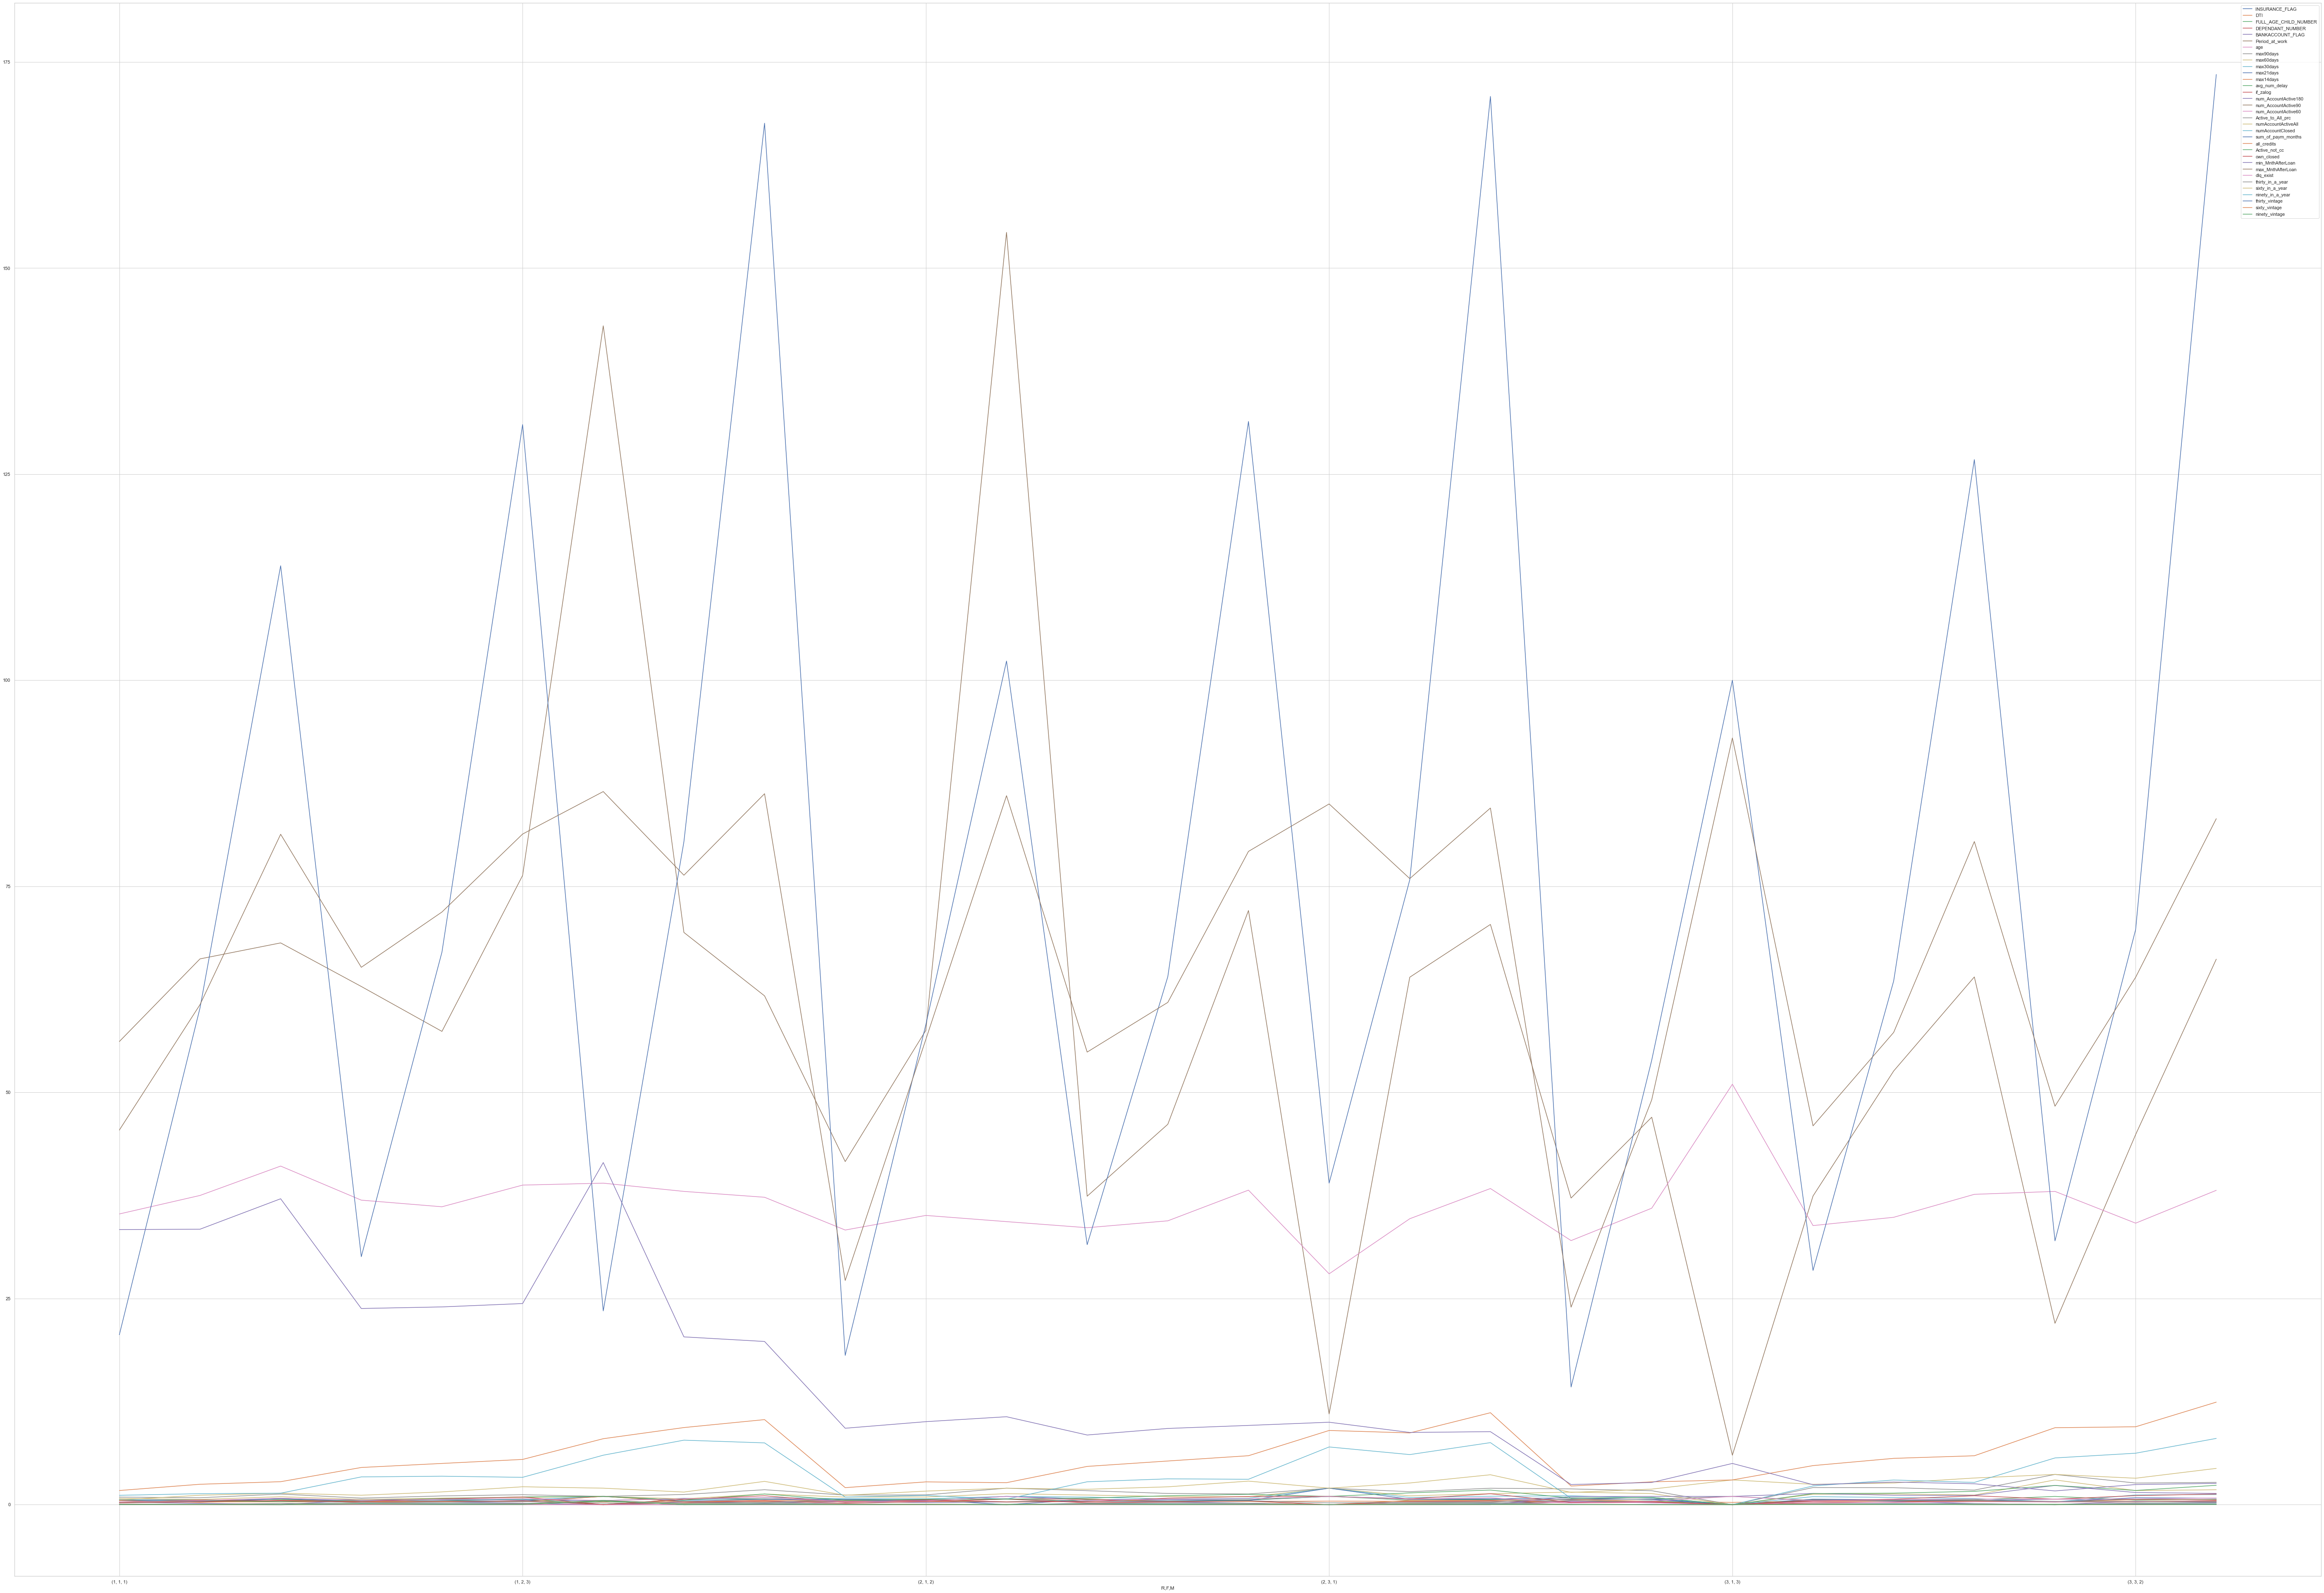

In [60]:
# График показывает просто медианные значения по сегментам
fig, ax = plt.subplots(figsize=(100,70))
df_new.plot(ax=ax)
plt.plot()

[]

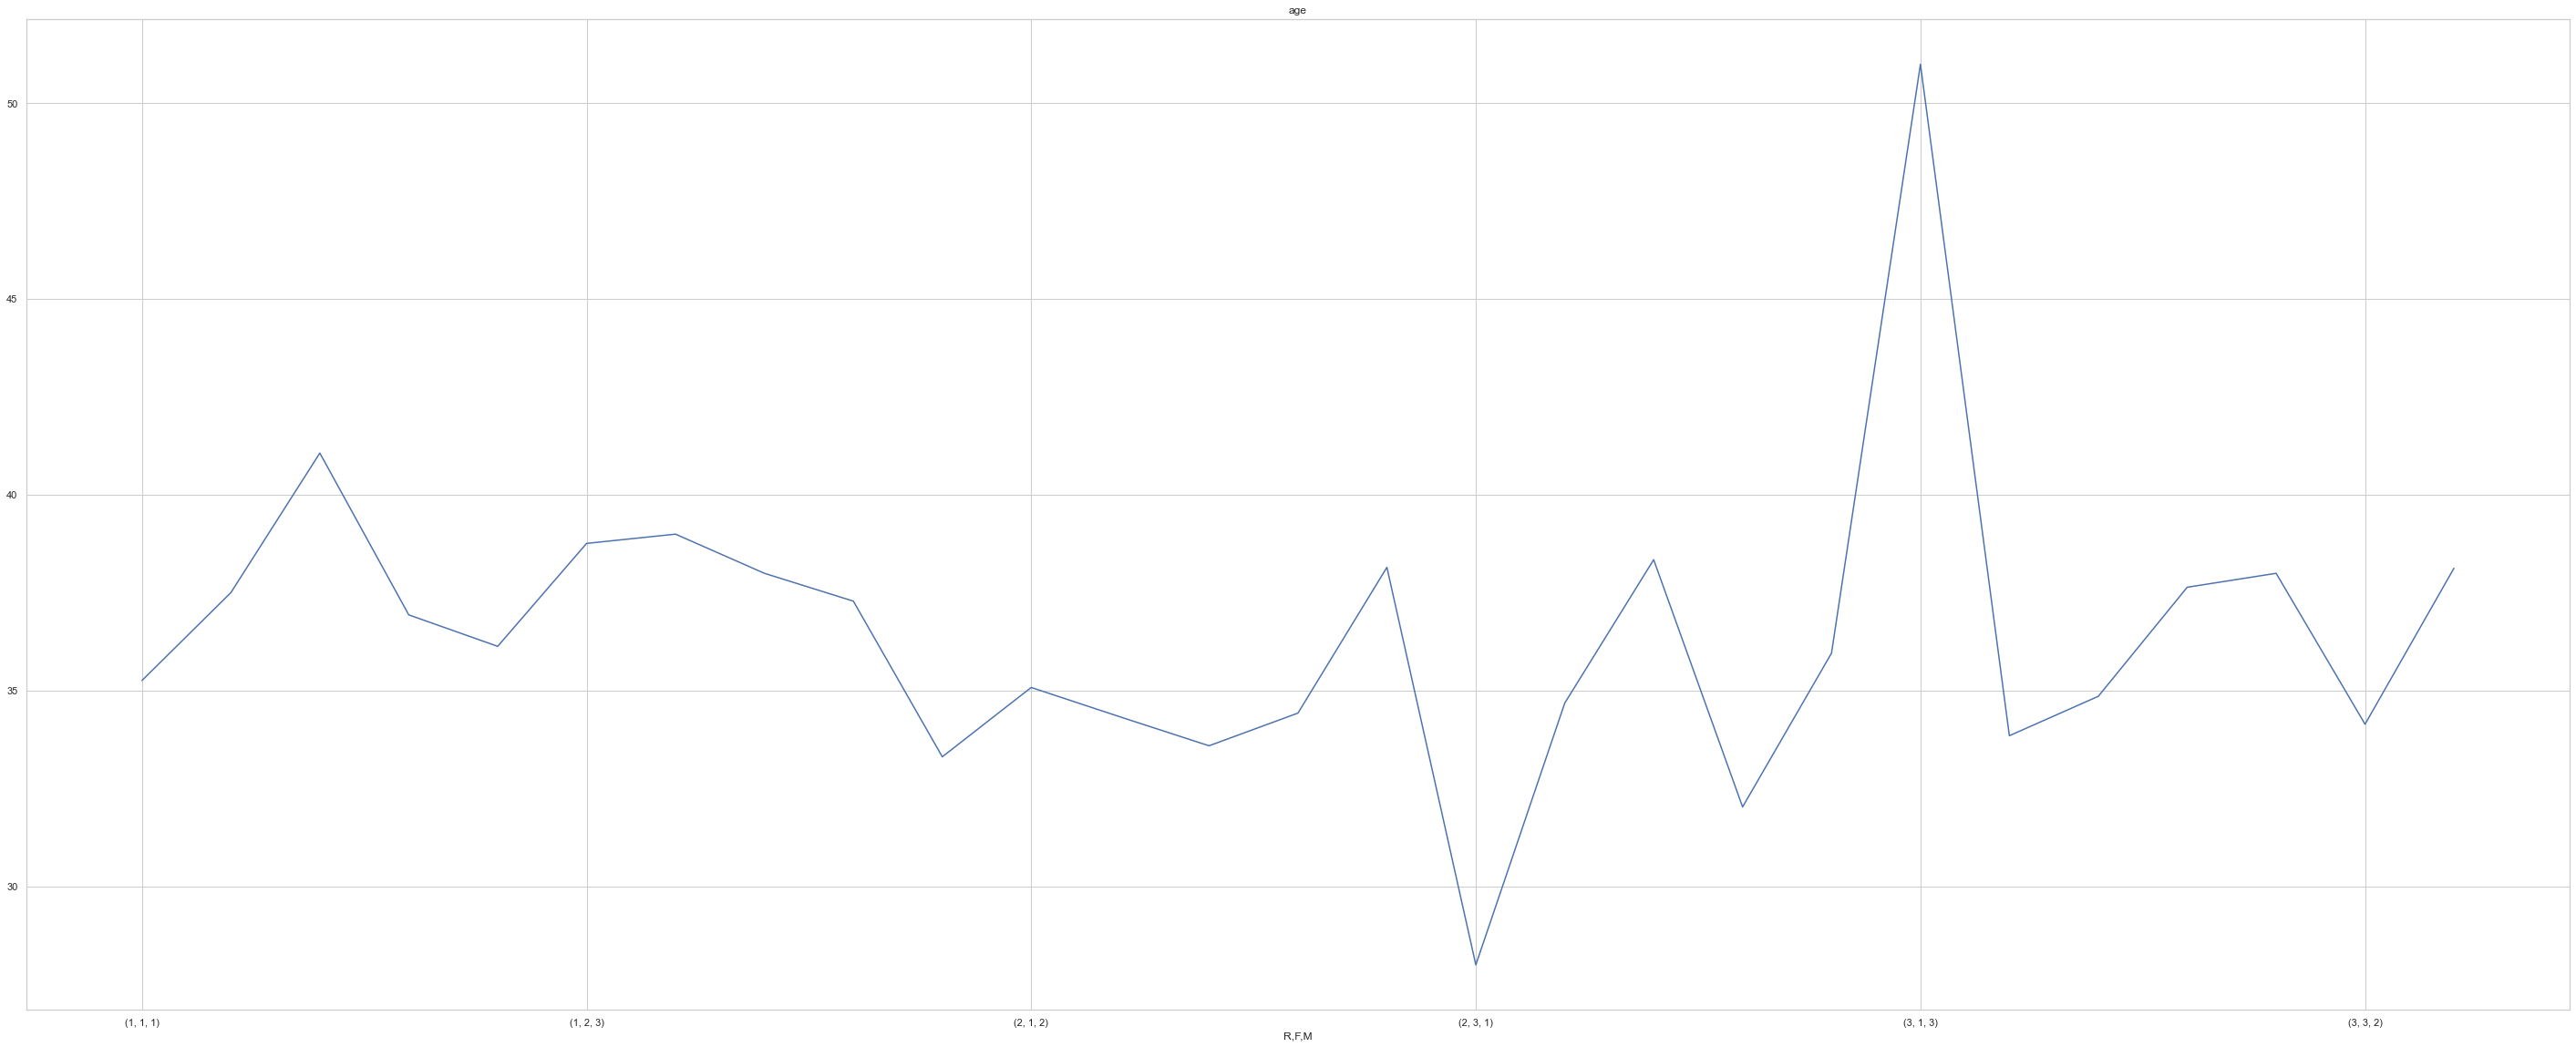

In [70]:
# Age
fig, ax = plt.subplots(figsize=(50,20))
df_new['age'].plot()
plt.plot()

[]

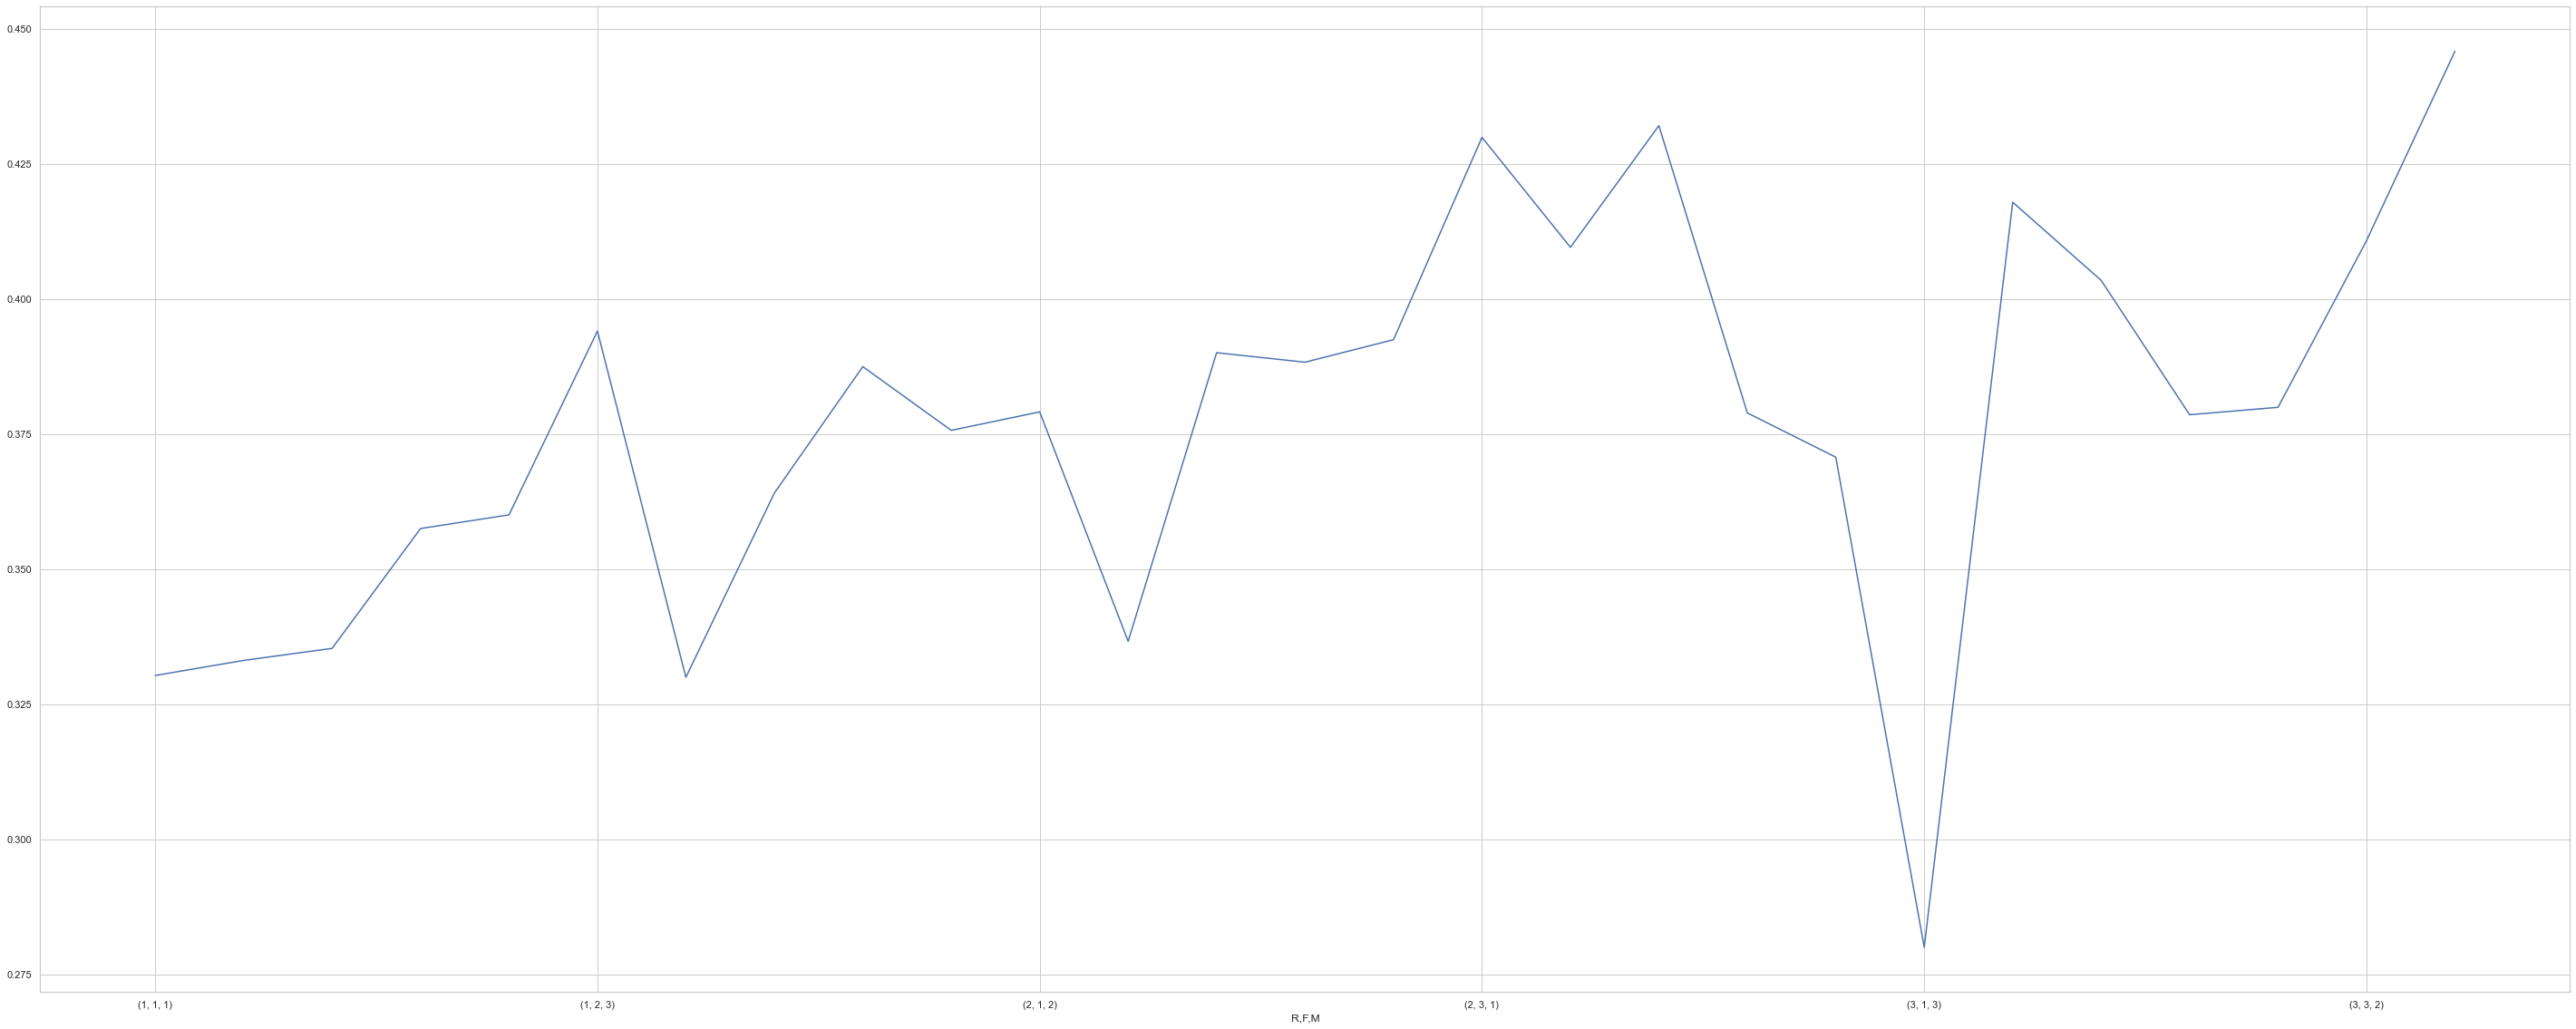

In [71]:
# DTI
fig, ax = plt.subplots(figsize=(50,20))
df_new['DTI'].plot()
plt.plot()

[]

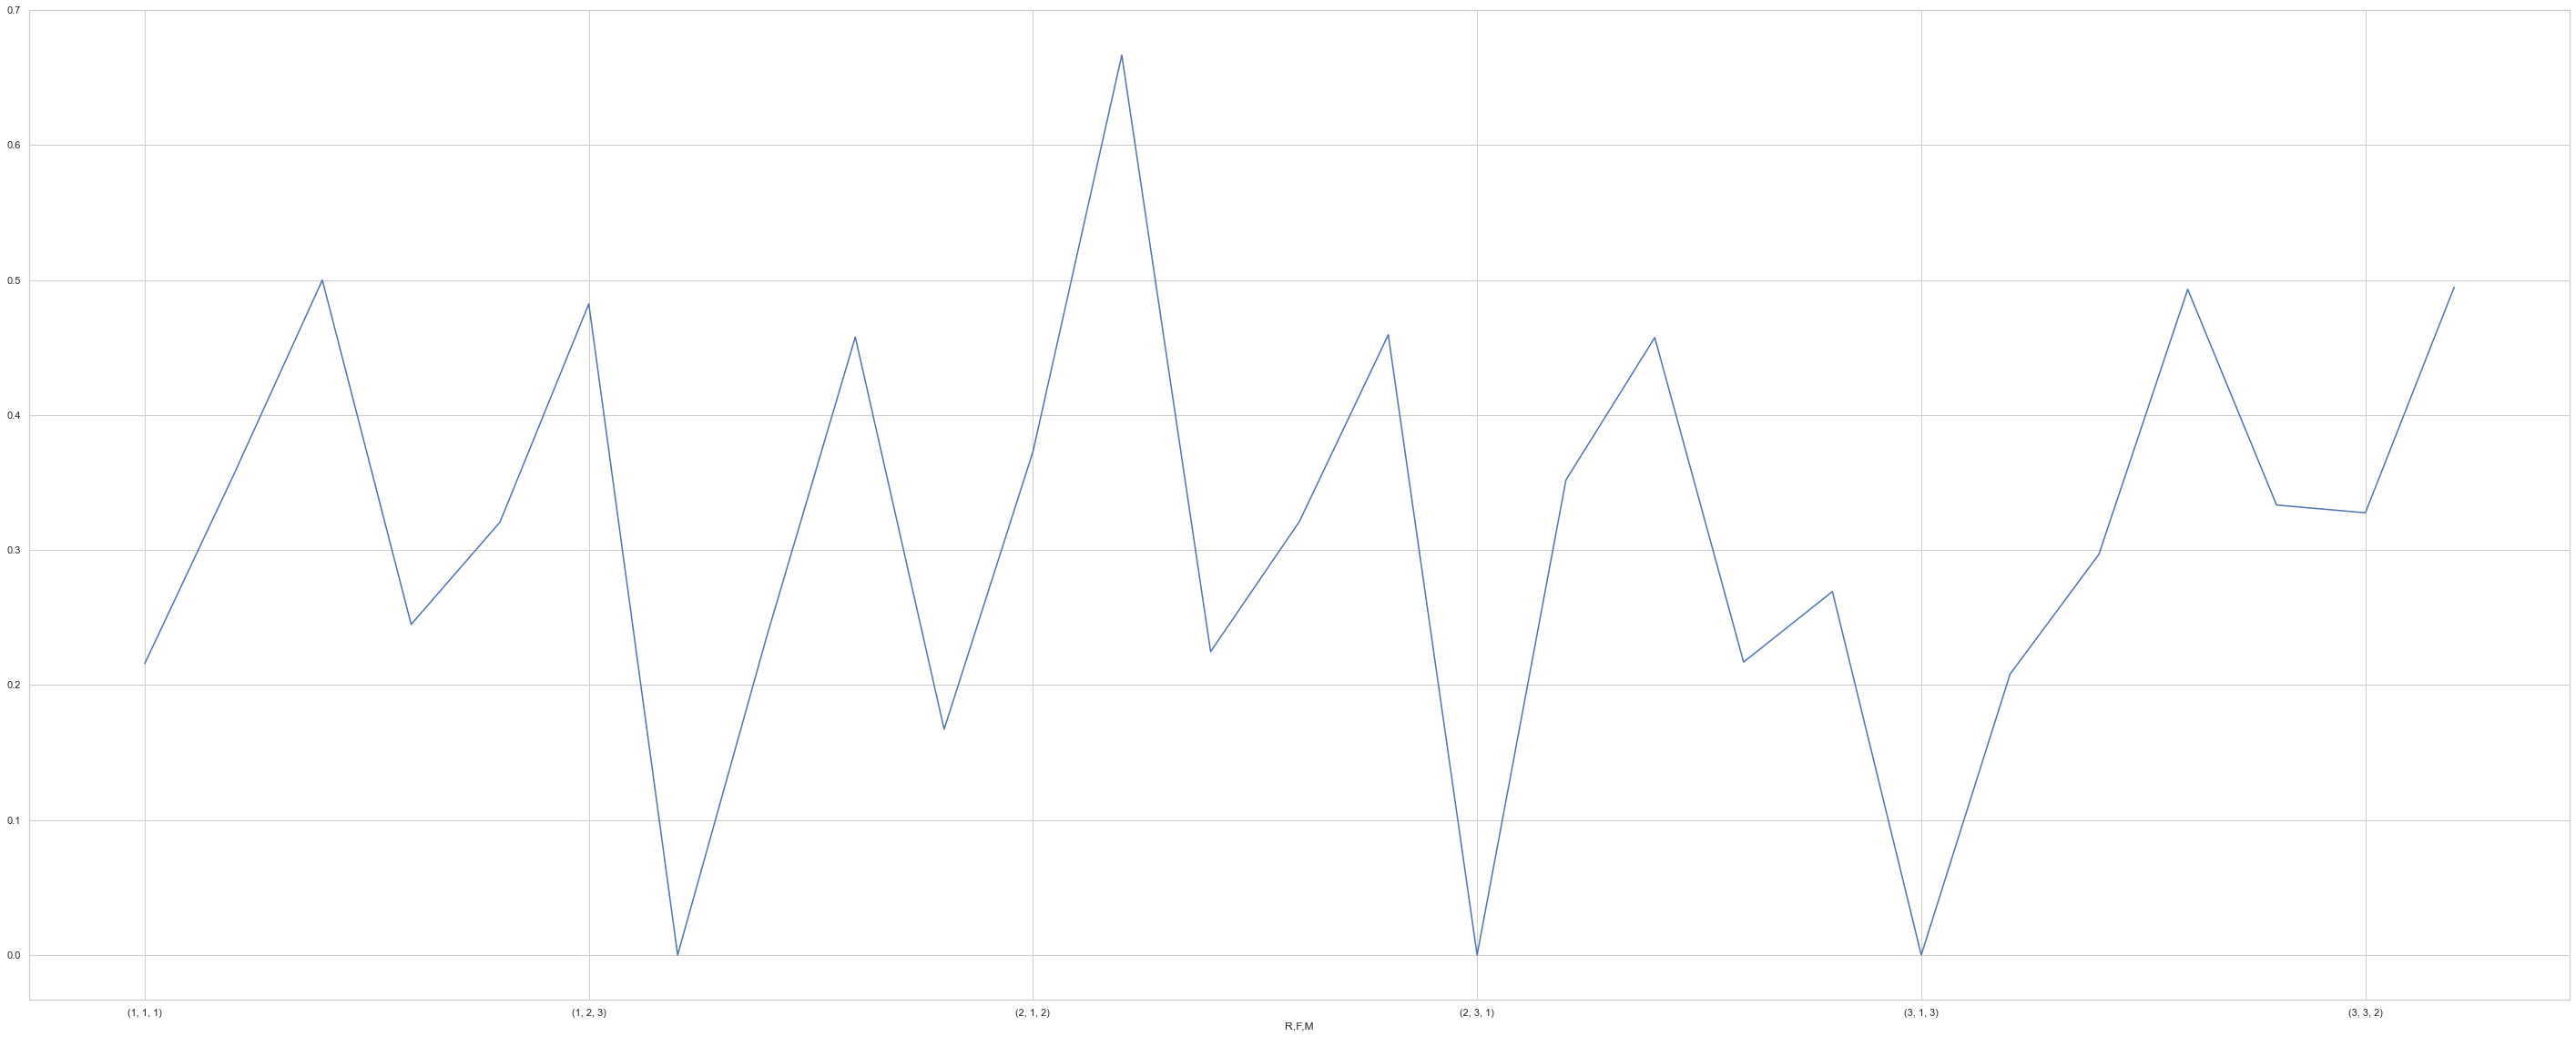

In [72]:
# if_zalog
fig, ax = plt.subplots(figsize=(50,20))
df_new['if_zalog'].plot()
plt.plot()

[]

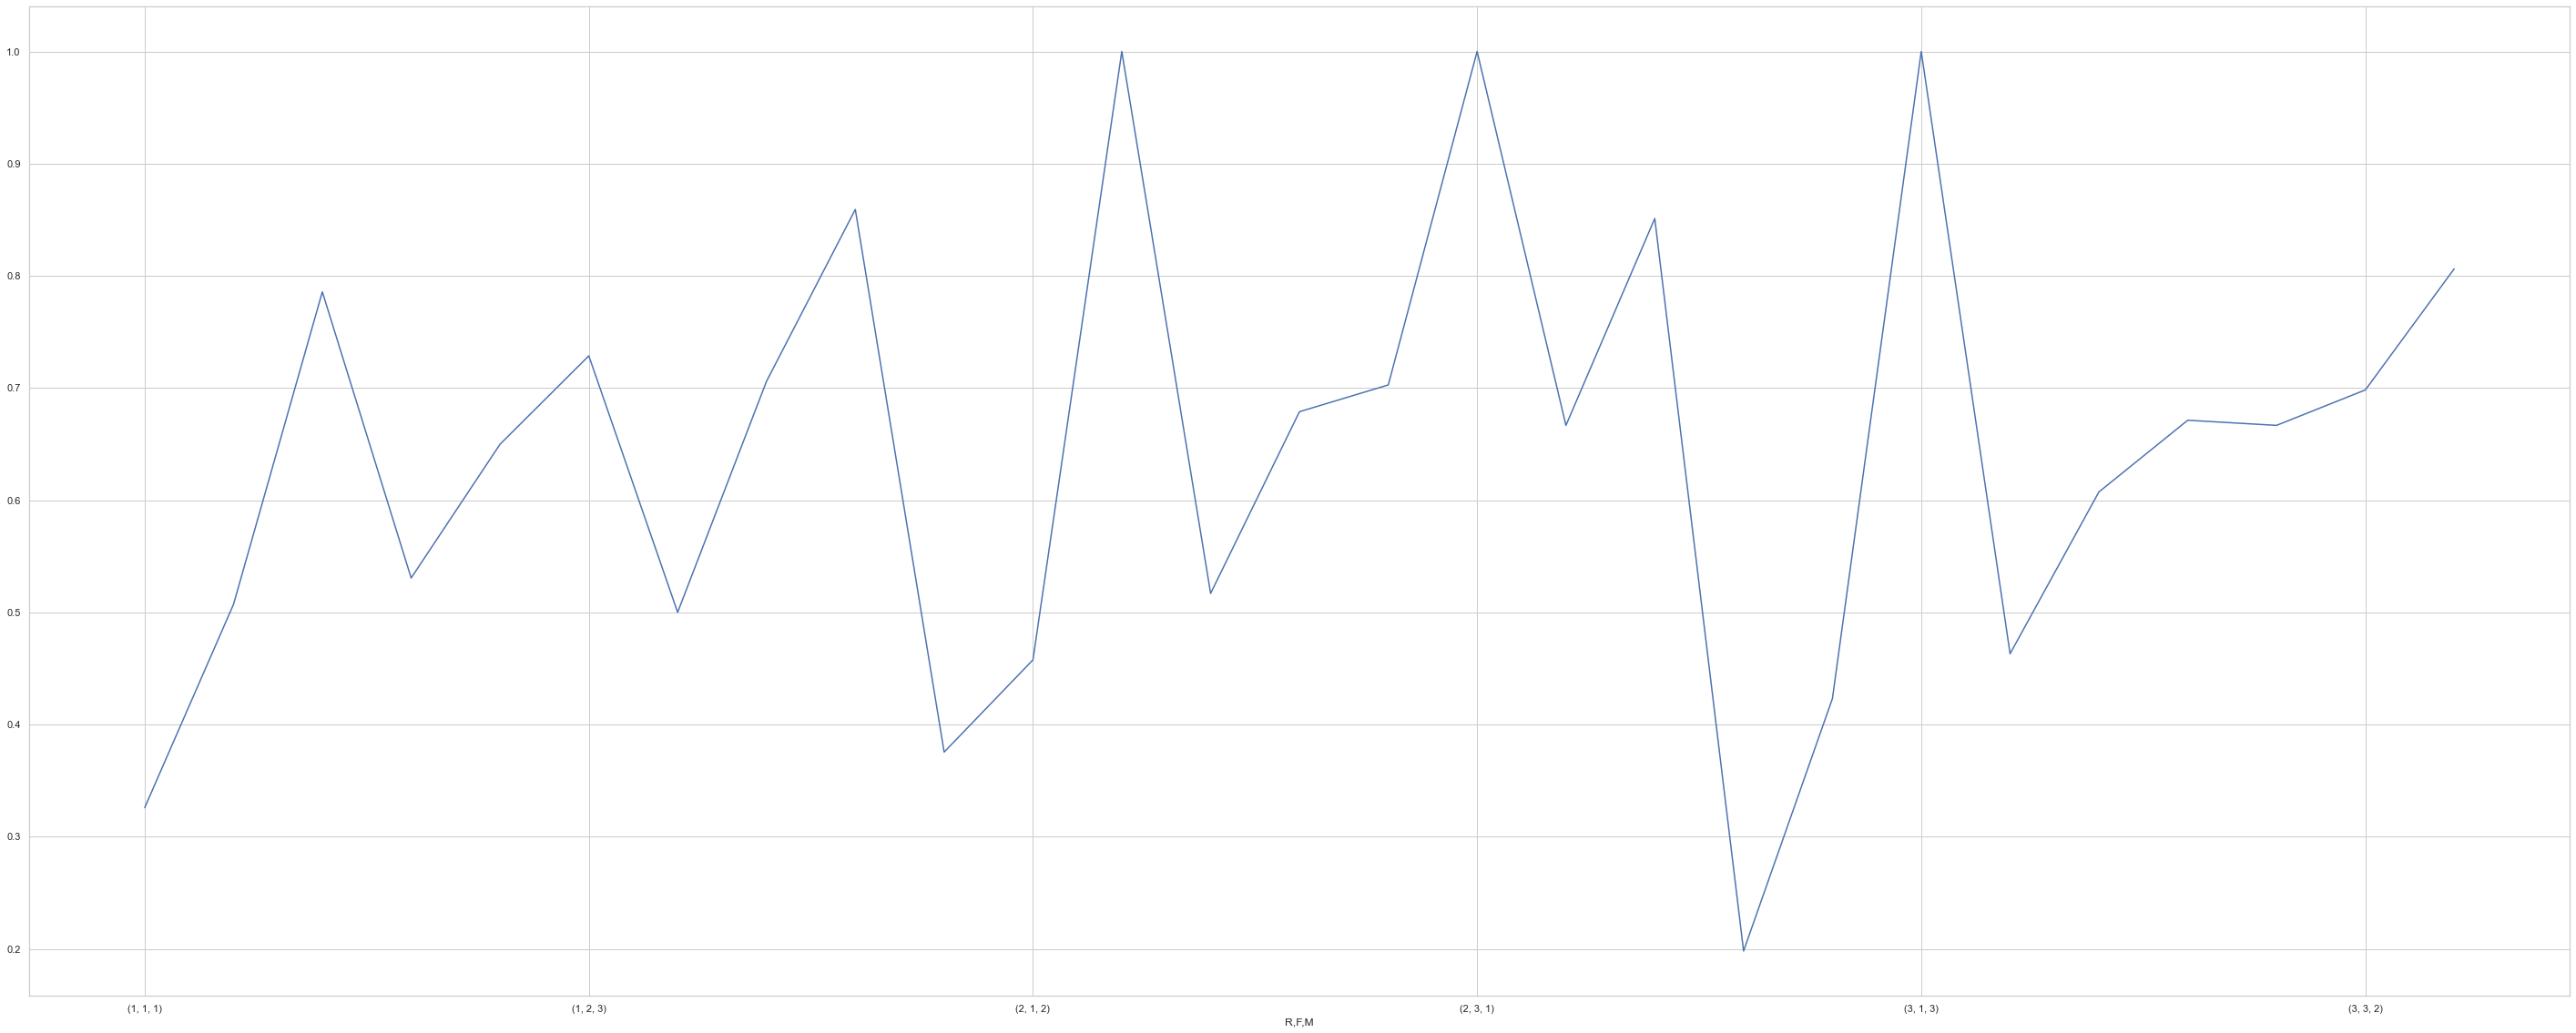

In [73]:
# dlq_exist
fig, ax = plt.subplots(figsize=(50,20))
df_new['dlq_exist'].plot()
plt.plot()

In [74]:
# Обрезанная табличка
df_new[['DTI', 'age', 'avg_num_delay', 'if_zalog', 'dlq_exist']]

DTI        age  avg_num_delay  if_zalog  dlq_exist
R F M                                                         
1 1 1  0.330337  35.262921       0.064809  0.215730   0.325843
    2  0.333128  37.507109       0.044398  0.355450   0.507109
    3  0.335357  41.071429       0.038040  0.500000   0.785714
  2 1  0.357551  36.938776       0.116987  0.244898   0.530612
    2  0.360084  36.135021       0.081741  0.320675   0.649789
    3  0.394121  38.763819       0.055975  0.482412   0.728643
  3 1  0.330000  39.000000       0.395161  0.000000   0.500000
    2  0.364118  38.000000       0.056776  0.235294   0.705882
    3  0.387535  37.288732       0.072560  0.457746   0.859155
2 1 1  0.375734  33.313993       0.064295  0.167235   0.375427
    2  0.379153  35.084746       0.037097  0.372881   0.457627
    3  0.336667  34.333333       0.050445  0.666667   1.000000
  2 1  0.390112  33.595506       0.093318  0.224719   0.516854
    2  0.388358  34.430657       0.077330  0.321168   0.678832
    3  0.392523  38.153153       0.057600  0.459459   0.702703
  3 1  0.430000  28.000000       0.025000  0.000000   1.000000
    2  0.409630  34.685185       0.063078  0.351852   0.666667
    3  0.432163  38.347518       0.062502  0.457447   0.851064
3 1 1  0.378962  32.033019       0.045709  0.216981   0.198113
    2  0.370769  35.961538       0.021785  0.269231   0.423077
    3  0.280000  51.000000       0.056604  0.000000   1.000000
  2 1  0.417987  33.852349       0.072982  0.208054   0.463087
    2  0.403516  34.858447       0.063046  0.296804   0.607306
    3  0.378630  37.643836       0.052930  0.493151   0.671233
  3 1  0.380000  38.000000       0.053216  0.333333   0.666667
    2  0.410862  34.146552       0.073038  0.327586   0.698276
    3  0.445942  38.130890       0.057523  0.494764   0.806283

#### Выводы:

**Описывать каждый сегмент по каждой переменной, как я считаю, слишком ресурсоемко и не оправдывает вложенных усилий, поэтому я буду смотреть лишь на некоторые показатели:** 'DTI' (долг к доходам), 'age' (возраст), 'avg_num_delay' (средне количество задержек до оплаты на кредит), 'if_zalog' (наличие залога), 'dlq_exist' (наличие просрочки) <br><br>

**Сегменты будут коротко называться по индексу R.F.M.** 
- 1.1.1 DTI около 35%, age около 35, задержек оплат относительно других групп средне, залог имеют меньше 25%, просрочек текущих чаще нет
- 1.1.2 DTI около 35%, age около 40, задержек оплат относительно других групп мало, залог имеют меньше 50%, просрочек текущих чаще есть
- 1.1.3 DTI около 35%, age около 40, задержек оплат относительно других групп мало, залог имеют больше 50%, просрочек текущих чаще есть
- 1.2.1 DTI около 35%, age около 35, задержек оплат относительно других групп много, залог имеют меньше 25%, просрочек текущих чаще есть
- 1.2.2 DTI около 35%, age около 35, задержек оплат относительно других групп много, залог имеют меньше 50%, просрочек текущих чаще есть
- 1.2.3 DTI около 40%, age около 40, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть
- Red Flag 1.3.1 DTI около 35%, age около 40, **задержек оплат относительно других групп критически много**,  **залог имеют около 0%**, просрочек текущих чаще есть
- 1.3.2 DTI около 35%, age около 40, задержек оплат относительно других групп средне, залог имеют меньше 25%, просрочек текущих чаще есть
- 1.3.3 DTI около 40%, age около 40, задержек оплат относительно других групп много, залог имеют меньше 50%, просрочек текущих чаще есть
- 2.1.1 DTI около 40%, age около 35, задержек оплат относительно других групп средне, залог имеют меньше 25%, просрочек текущих чаще нет
- 2.1.2 DTI около 40%, age около 35, задержек оплат относительно других групп мало, залог имеют меньше 50%, просрочек текущих чаще нет
- 2.1.3 DTI около 35%, age около 35, задержек оплат относительно других групп средне, залог имеют более 50%, просрочек текущих чаще есть
- 2.2.1 DTI около 40%, age около 35, задержек оплат относительно других групп много, залог имеют меньше 25%, просрочек текущих чаще есть
- 2.2.2 DTI около 40%, age около 35, задержек оплат относительно других групп много, залог имеют меньше 50%, просрочек текущих чаще есть
- 2.2.3 DTI около 40%, age около 40, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть
- 2.3.1 DTI около 45%, age около 30, задержек оплат относительно других групп мало, **залог имеют около 0%**, просрочек текущих чаще есть
- 2.3.2 DTI около 40%, age около 35, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть
- 2.3.3 DTI около 45%, age около 40, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть
- 3.1.1 DTI около 40%, age около 35, задержек оплат относительно других групп средне, залог имеют меньше 25%, просрочек текущих чаще нет
- 3.1.2 DTI около 35%, age около 35, задержек оплат относительно других групп мало, залог имеют меньше 50%, просрочек текущих чаще нет
- 3.1.3 DTI около 30%, **age около 50**, задержек оплат относительно других групп средне, **залог имеют около 0%**, просрочек текущих чаще есть
- 3.2.1 DTI около 40%, age около 35, задержек оплат относительно других групп много, залог имеют меньше 25%, просрочек текущих чаще нет
- 3.2.2 DTI около 40%, age около 35, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть
- 3.2.3 DTI около 40%, age около 40, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть
- 3.3.1 DTI около 40%, age около 40, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть
- 3.3.2 DTI около 40%, age около 35, задержек оплат относительно других групп много, залог имеют меньше 50%, просрочек текущих чаще есть
- 3.3.3 DTI около 45%, age около 40, задержек оплат относительно других групп средне, залог имеют меньше 50%, просрочек текущих чаще есть

**Важно, что есть сегмент, в котором есть текущие просрочки и нет залога - на такую категорию стоит обратить внимание** <br>
**Важно, что во многих сегментах есть текущие просрочки - потенциальный риск**<br>

**Таким образом, мы с помощью RFM анализа выявили и описали сегменты, заметив при этом некоторые закономерности, которые требуют дополнительного внимания**

## 2.2.Способ_2 - K-means
- Выделить сегменты клиентов
- Сформировать портреты клиентов на основе полученных данных + дать интерпретацию полученным сегментам
- Обосновать выбор метода + плюсы и минусы на анализируемых данных и на теории из лекций и семинаров

Вне зависимости от метода необходимо следующее:
1. Внутри сегмента однородность максимальная
2. Между сегментами однородность минимальна

In [92]:
df = pd.read_csv('HW1_var_12.csv', sep=';')
df = pd.get_dummies(df, columns=cat_var)
df.fillna(df.mean(), inplace=True)

In [93]:
# Нормализация данных
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

# df = scaler.fit_transform(df)

In [94]:
# Сделаем простую kmeans кластеризацию на 10 групп
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

km_pred = km.fit_predict(df.iloc[:,1:])
df['kmeans'] = km_pred

In [95]:
df.columns.values[2:]

array(['INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
       'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
       'avg_num_delay', 'if_zalog', 'num_AccountActive180',
       'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
       'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months',
       'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year',
       'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage',
       'sixty_vintage', 'ninety_vintage', 'INCOME_BASE_TYPE_2НДФЛ',
       'INCOME_BASE_TYPE_3НДФЛ',
       'INCOME_BASE_TYPE_Поступление зарплаты на счет',
       'INCOME_BASE_TYPE_Свободная форма с печатью работодателя',
       'INCOME_BASE_TYPE_Форма банка (без печати работодателя)',
       'CREDIT_PURPOSE_Другое', 'CREDIT_PURPOSE_Лечение',
       'CREDIT_PURPOSE_Обучение', 'CREDIT_PURPOS

In [96]:
# Посмотрим среднии по кластерам по всем показателям
pd.set_option("display.max_rows", None, "display.max_columns", None)

colsall = ['INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
       'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
       'avg_num_delay', 'if_zalog', 'num_AccountActive180',
       'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
       'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months',
       'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year',
       'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage',
       'sixty_vintage', 'ninety_vintage', 'INCOME_BASE_TYPE_2НДФЛ',
       'INCOME_BASE_TYPE_3НДФЛ',
       'INCOME_BASE_TYPE_Поступление зарплаты на счет',
       'INCOME_BASE_TYPE_Свободная форма с печатью работодателя',
       'INCOME_BASE_TYPE_Форма банка (без печати работодателя)',
       'CREDIT_PURPOSE_Другое', 'CREDIT_PURPOSE_Лечение',
       'CREDIT_PURPOSE_Обучение', 'CREDIT_PURPOSE_Отпуск',
       'CREDIT_PURPOSE_Покупка автомобиля',
       'CREDIT_PURPOSE_Покупка бытовой техники',
       'CREDIT_PURPOSE_Покупка земли', 'CREDIT_PURPOSE_Покупка мебели',
       'CREDIT_PURPOSE_Покупка недвижимости/ строительство',
       'CREDIT_PURPOSE_Ремонт', 'SEX_женский', 'SEX_мужской',
       'EDUCATION_*n.a.*',
       'EDUCATION_Высшее/Второе высшее/Ученая степень',
       'EDUCATION_Неполное среднее', 'EDUCATION_второе высшее',
       'EDUCATION_высшее', 'EDUCATION_незаконченное высшее',
       'EDUCATION_среднее', 'EDUCATION_среднее-специальное',
       'EDUCATION_ученая степень', 'EMPL_TYPE_вспомогательный персонал',
       'EMPL_TYPE_другое', 'EMPL_TYPE_менеджер высшего звена',
       'EMPL_TYPE_менеджер по продажам',
       'EMPL_TYPE_менеджер среднего звена', 'EMPL_TYPE_рабочий',
       'EMPL_TYPE_специалист', 'EMPL_TYPE_страховой агент',
       'EMPL_TYPE_торговый представитель', 'EMPL_SIZE_*n.a.*',
       'EMPL_SIZE_< 50', 'EMPL_SIZE_>100', 'EMPL_SIZE_>250',
       'EMPL_SIZE_>=100', 'EMPL_SIZE_>=150', 'EMPL_SIZE_>=200',
       'EMPL_SIZE_>=50', 'EMPL_PROPERTY_Государственная служба',
       'EMPL_PROPERTY_Другое', 'EMPL_PROPERTY_Информационные технологии',
       'EMPL_PROPERTY_Наука', 'EMPL_PROPERTY_Производство',
       'EMPL_PROPERTY_Сельское и лесное хозяйство',
       'EMPL_PROPERTY_Строительство', 'EMPL_PROPERTY_Торговля',
       'EMPL_PROPERTY_Транспорт', 'EMPL_PROPERTY_Туризм',
       'EMPL_PROPERTY_Финансы', 'EMPL_PROPERTY_Юридические услуги',
       'EMPL_FORM_Государственное предприятие', 'EMPL_FORM_ЗАО',
       'EMPL_FORM_Иная форма', 'EMPL_FORM_Индивидуальный предприниматель',
       'EMPL_FORM_ОАО', 'EMPL_FORM_ООО', 'FAMILY_STATUS_вдовец / вдова',
       'FAMILY_STATUS_гражданский брак', 'FAMILY_STATUS_женат / замужем',
       'FAMILY_STATUS_повторный брак',
       'FAMILY_STATUS_разведен / разведена',
       'FAMILY_STATUS_холост / не замужем']     

# df.drop(df.loc[(df['num_AccountActive180'] == -10000) * (df['kmeans'] != 3)].index, inplace=True)
df_km = df.groupby('kmeans')[colsall].mean()
df_km

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,INCOME_BASE_TYPE_2НДФЛ,INCOME_BASE_TYPE_3НДФЛ,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Другое,CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,SEX_женский,SEX_мужской,EDUCATION_*n.a.*,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_Неполное среднее,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень,EMPL_TYPE_вспомогательный персонал,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель,EMPL_SIZE_*n.a.*,EMPL_SIZE_< 50,EMPL_SIZE_>100,EMPL_SIZE_>250,EMPL_SIZE_>=100,EMPL_SIZE_>=150,EMPL_SIZE_>=200,EMPL_SIZE_>=50,EMPL_PROPERTY_Государственная служба,EMPL_PROPERTY_Другое,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Наука,EMPL_PROPERTY_Производство,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Строительство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Транспорт,EMPL_PROPERTY_Туризм,EMPL_PROPERTY_Финансы,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_Государственное предприятие,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.142346,-0.035618,0.018174,0.027870,-0.119094,-0.214478,0.058912,-0.066390,-0.192170,-0.248433,-0.232573,-0.224560,3.003648,-0.074980,-0.202053,-0.085947,-0.103255,-0.530020,0.160197,0.767747,0.459165,0.672354,0.090354,-0.081916,0.089286,1.239994,1.402430,3.918574,5.214153,4.902498,2.227517,2.386785,2.343564,-0.195949,-0.009882,0.127690,0.153109,-0.004077,-0.014732,-0.006585,-0.023569,0.119272,-0.099471,0.003196,-0.042012,0.035163,-0.148139,0.141276,0.010145,-0.010145,0.009236,-0.002916,-0.019766,-0.028503,-0.031844,0.076804,0.030810,0.012995,-0.047442,0.131841,-0.111604,0.154866,0.132648,-0.038856,-0.130183,-0.114783,-0.013975,0.160358,-0.013975,0.234293,-0.198431,0.308926,-0.151229,-0.175195,-0.186706,-0.322891,-0.181605,0.558741,0.089348,-0.202646,-0.457082,0.037359,-0.202907,0.944797,-0.228684,-0.068620,-0.234534,0.171401,0.114149,0.263348,0.292127,0.040638,0.217226,1.044733,-0.019766,0.080106,0.783076,0.217306,0.302108,0.633661
1,-0.018667,0.012233,0.022143,-0.002967,0.069352,0.113696,0.042628,-0.000479,-0.001039,-0.001157,-0.000181,0.000012,0.002525,-0.001696,-0.000588,0.000438,0.000299,-0.000724,0.002053,0.002665,0.002011,0.002969,0.002882,-0.000841,-0.001447,0.002399,0.004297,0.009417,-0.001944,-0.001714,0.009104,-0.000842,-0.000855,0.098322,-0.009882,-0.102772,-0.033936,0.012027,0.007657,-0.010294,-0.002627,-0.020041,0.025173,-0.013215,0.009092,0.000612,0.008408,-0.016116,-0.069936,0.069936,-0.008185,-0.015547,-0.003594,0.018219,-0.005661,-0.017982,-0.005132,0.025707,0.003188,-0.022444,0.068122,-0.048586,-0.041082,-0.003695,0.071720,-0.005342,0.008893,-0.016942,-0.013975,-0.1

**Выводы:** 

**Описывать каждый сегмент по каждой переменной, как я считаю, слишком ресурсоемко и не оправдывает вложенных усилий, поэтому я буду смотреть лишь на некоторые показатели:** 'DTI' (долг к доходам), 'age' (возраст), 'avg_num_delay' (средне количество задержек до оплаты на кредит), 'if_zalog' (наличие залога), 'dlq_exist' (наличие просрочки) <br>

- В группу 0 попали потенциальные заемщики c средним DTI, средних лет, часто задерживают выплаты, чаще без залога, много кредитов брали за все время, часто есть текущая просрочка
- В группу 1 попали потенциальные заемщики c средним DTI, средних лет, средне задерживают выплаты, чаще без залога, средне кредитов брали за все время, редко есть текущая просрочка
- В группу 2 попали потенциальные заемщики c высоким DTI, старшего поколения, редко задерживают выплаты, чаще с залогом, много кредитов брали за все время, часто есть текущая просрочка
- В группу 3 попали потенциальные заемщики c низким DTI, молодые, редко задерживают выплаты, чаще без залога, мало кредитов брали за все время, редко есть текущая просрочка <br>
 

- **Важно, что в группу 0 попали клиенты, которым нужно очень аккуратно выдавать кредиты - уже были просрочки, часто задерживают выплаты, DTI средний** <br>
- Важно, что в группу 1 довольно надежные клиенты, редко задерживают выплаты, DTI средний<br>
- **Важно, что в группу 2 попали взрослые люди, у которых уже есть много кредитов, но при этом они редко задерживали выплаты и у них есть залог, стоит уделить внимание, но не такое пристальное, как группе 0**<br>
- Важно, что в группу 3 попали очень перспективные молодые клиенты, у которых сейчас мало долгов и которые редко задерживали выплаты до этого, но и кредитов у них мало<br>

**Таким образом, мы с помощью k-means метода выявили и описали сегменты, заметив при этом некоторые закономерности, которые требуют дополнительного внимания**